In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

print (pd.__version__)

######### DEFINITION OF GLOBAL VARIABLES #########
RUN_CONFIGURATION_LOOP = False

Using TensorFlow backend.
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


1.0.3


In [2]:
import os 
import sys
#sys.path.append('/')
import circuits


In [3]:
#These are super long functions to be hard coded because i dont have time to properly fix them, sorry bout it
#[(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    #graph_df = pd.DataFrame(df["Labels"], x_data, z_data, columns=["Labels", "XSyn", "ZSyn"])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
    
def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

In [4]:
#These functions needed to work with the GraphDecoder/MWPM module
import time

def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))
    
def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    #decoder.graph_2D(G,'distance')
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 

import random
def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs

def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   

def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

In [5]:
#Function needed for preprocessing. CSV file reads in a string, needs to be a list for labels 
#for preprocessing csv files
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows

def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)

def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)

def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

In [6]:
#x_d7= trainData_d7.dropna()
#######################################################################################################

trainData_d7 = pd.read_csv("depth7_all_combos.csv")
trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
mlb_d7 = MultiLabelBinarizer()
mlb_d7.fit(trainData_d7['Labels'])
df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
df['Labels']= df.values.tolist()
trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

#######################################################################################

trainData_d5 = pd.read_csv("depth5_all_combos.csv")
trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05
#These four lines remove duplicates
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))
trainData_d5['Labels'] = trainData_d5['Labels'].astype(str)
trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))


testData_d5_MWPM = graph_with_errs_d5(trainData_d5)


#transforms the data to encoding for ML
mlb = MultiLabelBinarizer()
mlb.fit(trainData_d5['Labels'])
df = pd.DataFrame(mlb.transform(trainData_d5['Labels']))
df['Labels']= df.values.tolist()
trainData_d5 = trainData_d5.drop(['Labels'], axis=1)
trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True)
trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"]
#########################################################################################

#Has no duplicates, small enough to check manually
trainData_d3 = pd.read_csv("depth3_all_combos.csv")

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x))
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01))

testData_d3_MWPM = graph_with_errs_d3(trainData_d3)

mlb_d3 = MultiLabelBinarizer()
mlb_d3.fit(trainData_d3["Labels"])
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels']))
df['Labels']= df.values.tolist()
trainData_d3 = trainData_d3.drop(['Labels'], axis=1)
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True)
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"]
#########################################################################################
y_d3 = trainData_d3["Labels"]
x_d3 = trainData_d3.drop(["Labels"], axis=1)

y_d5 = trainData_d5["Labels"] 
x_d5 = trainData_d5.drop(["Labels"], axis=1) 

y_d7 = trainData_d7["Labels"]
x_d7 = trainData_d7.drop(["Labels"], axis=1)


x_d3 = x_d3.replace([-1], 0)
x_d5 = x_d5.replace([-1], 0)
x_d7 = x_d7.replace([-1], 0)

In [12]:
y_d7 = trainData_d7["Labels"] 

In [7]:
#functions for creating lookup tables here:
from collections import defaultdict
from math import log2

def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)

class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
        
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
        
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])

In [8]:
def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

In [9]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 2
    #input layer
    model.add(Dense(8, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(lr=0.05),
                  metrics=['accuracy'])
    return model

#make any needed changes here
def compile_FFNN_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(24, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model


#make any needed changes here
def compile_FFNN_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(48, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy'])
    return model


------------------------------------------------------------------------
Training for fold 1 ...
Train on 17 samples, validate on 5 samples
Epoch 1/200
17/17 [==============================] - 0s 9ms/step - loss: 0.7432 - accuracy: 0.4861 - val_loss: 0.7206 - val_accuracy: 0.5158
Epoch 2/200
17/17 [==============================] - 0s 287us/step - loss: 0.7379 - accuracy: 0.4861 - val_loss: 0.7171 - val_accuracy: 0.5158
Epoch 3/200
17/17 [==============================] - 0s 172us/step - loss: 0.7328 - accuracy: 0.4954 - val_loss: 0.7136 - val_accuracy: 0.5263
Epoch 4/200
17/17 [==============================] - 0s 172us/step - loss: 0.7280 - accuracy: 0.5077 - val_loss: 0.7103 - val_accuracy: 0.5158
Epoch 5/200
17/17 [==============================] - 0s 230us/step - loss: 0.7232 - accuracy: 0.5232 - val_loss: 0.7070 - val_accuracy: 0.5263
Epoch 6/200
17/17 [==============================] - 0s 230us/step - loss: 0.7186 - accuracy: 0.5263 - val_loss: 0.7038 - val_accuracy: 0.5263
Epoc

Epoch 57/200
17/17 [==============================] - 0s 230us/step - loss: 0.5404 - accuracy: 0.8514 - val_loss: 0.5725 - val_accuracy: 0.8211
Epoch 58/200
17/17 [==============================] - 0s 115us/step - loss: 0.5364 - accuracy: 0.8514 - val_loss: 0.5696 - val_accuracy: 0.8211
Epoch 59/200
17/17 [==============================] - 0s 172us/step - loss: 0.5323 - accuracy: 0.8483 - val_loss: 0.5666 - val_accuracy: 0.8211
Epoch 60/200
17/17 [==============================] - 0s 172us/step - loss: 0.5283 - accuracy: 0.8483 - val_loss: 0.5636 - val_accuracy: 0.8316
Epoch 61/200
17/17 [==============================] - 0s 115us/step - loss: 0.5242 - accuracy: 0.8514 - val_loss: 0.5605 - val_accuracy: 0.8316
Epoch 62/200
17/17 [==============================] - 0s 172us/step - loss: 0.5200 - accuracy: 0.8514 - val_loss: 0.5574 - val_accuracy: 0.8316
Epoch 63/200
17/17 [==============================] - 0s 172us/step - loss: 0.5158 - accuracy: 0.8545 - val_loss: 0.5542 - val_accuracy:

Epoch 114/200
17/17 [==============================] - 0s 172us/step - loss: 0.2910 - accuracy: 0.9381 - val_loss: 0.3909 - val_accuracy: 0.8947
Epoch 115/200
17/17 [==============================] - 0s 230us/step - loss: 0.2881 - accuracy: 0.9381 - val_loss: 0.3889 - val_accuracy: 0.8947
Epoch 116/200
17/17 [==============================] - 0s 172us/step - loss: 0.2853 - accuracy: 0.9381 - val_loss: 0.3870 - val_accuracy: 0.8947
Epoch 117/200
17/17 [==============================] - 0s 172us/step - loss: 0.2826 - accuracy: 0.9381 - val_loss: 0.3852 - val_accuracy: 0.8947
Epoch 118/200
17/17 [==============================] - 0s 115us/step - loss: 0.2800 - accuracy: 0.9381 - val_loss: 0.3834 - val_accuracy: 0.8947
Epoch 119/200
17/17 [==============================] - 0s 172us/step - loss: 0.2774 - accuracy: 0.9381 - val_loss: 0.3818 - val_accuracy: 0.8947
Epoch 120/200
17/17 [==============================] - 0s 230us/step - loss: 0.2750 - accuracy: 0.9381 - val_loss: 0.3802 - val_ac

Epoch 171/200
17/17 [==============================] - 0s 172us/step - loss: 0.2279 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 172/200
17/17 [==============================] - 0s 287us/step - loss: 0.2276 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 173/200
17/17 [==============================] - 0s 172us/step - loss: 0.2274 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 174/200
17/17 [==============================] - 0s 172us/step - loss: 0.2272 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 175/200
17/17 [==============================] - 0s 172us/step - loss: 0.2270 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 176/200
17/17 [==============================] - 0s 230us/step - loss: 0.2268 - accuracy: 0.9381 - val_loss: 0.3554 - val_accuracy: 0.8947
Epoch 177/200
17/17 [==============================] - 0s 115us/step - loss: 0.2266 - accuracy: 0.9381 - val_loss: 0.3555 - val_ac

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Train on 17 samples, validate on 5 samples
Epoch 1/200
17/17 [==============================] - 0s 8ms/step - loss: 0.6854 - accuracy: 0.5882 - val_loss: 0.6900 - val_accuracy: 0.5579
Epoch 2/200
17/17 [==============================] - 0s 230us/step - loss: 0.6845 - accuracy: 0.6037 - val_loss: 0.6891 - val_accuracy: 0.5579
Epoch 3/200
17/17 [==============================] - 0s 172us/step - loss: 0.6836 - accuracy: 0.6316 - val_loss: 0.6882 - val_accuracy: 0.5684
Epoch 4/200
17/17 [==============================] - 0s 172us/step - loss: 0.6828 - accuracy: 0.6440 - val_loss: 0.6873 - val_accuracy: 0.5684
Epoch 5/200
17/17 [==============================] - 0s 172us/step - loss: 0.6819 - accuracy: 0.6471 - val_loss: 0.6865 - val_accuracy: 0.5789
Epoch 6/200
17/17 [==============================] - 0s 172us/step - loss: 0.6810 - accuracy: 0.6533 - val_loss: 0.6856 - val_accuracy: 0.5895
Epoch 7/200
17/17 [==============================] - 0s 172us/step - loss: 0.6802 - accuracy: 0.6563 

Epoch 58/200
17/17 [==============================] - 0s 115us/step - loss: 0.6268 - accuracy: 0.7926 - val_loss: 0.6353 - val_accuracy: 0.7895
Epoch 59/200
17/17 [==============================] - 0s 172us/step - loss: 0.6255 - accuracy: 0.7926 - val_loss: 0.6341 - val_accuracy: 0.7895
Epoch 60/200
17/17 [==============================] - 0s 172us/step - loss: 0.6241 - accuracy: 0.7988 - val_loss: 0.6329 - val_accuracy: 0.7895
Epoch 61/200
17/17 [==============================] - 0s 172us/step - loss: 0.6227 - accuracy: 0.7988 - val_loss: 0.6317 - val_accuracy: 0.7895
Epoch 62/200
17/17 [==============================] - 0s 172us/step - loss: 0.6212 - accuracy: 0.7988 - val_loss: 0.6305 - val_accuracy: 0.7895
Epoch 63/200
17/17 [==============================] - 0s 115us/step - loss: 0.6198 - accuracy: 0.7988 - val_loss: 0.6293 - val_accuracy: 0.7895
Epoch 64/200
17/17 [==============================] - 0s 172us/step - loss: 0.6183 - accuracy: 0.7988 - val_loss: 0.6280 - val_accuracy:

Epoch 115/200
17/17 [==============================] - 0s 172us/step - loss: 0.5118 - accuracy: 0.8421 - val_loss: 0.5384 - val_accuracy: 0.8316
Epoch 116/200
17/17 [==============================] - 0s 172us/step - loss: 0.5089 - accuracy: 0.8421 - val_loss: 0.5361 - val_accuracy: 0.8316
Epoch 117/200
17/17 [==============================] - 0s 172us/step - loss: 0.5060 - accuracy: 0.8421 - val_loss: 0.5337 - val_accuracy: 0.8316
Epoch 118/200
17/17 [==============================] - 0s 172us/step - loss: 0.5031 - accuracy: 0.8421 - val_loss: 0.5313 - val_accuracy: 0.8316
Epoch 119/200
17/17 [==============================] - 0s 172us/step - loss: 0.5002 - accuracy: 0.8421 - val_loss: 0.5288 - val_accuracy: 0.8316
Epoch 120/200
17/17 [==============================] - 0s 172us/step - loss: 0.4972 - accuracy: 0.8452 - val_loss: 0.5263 - val_accuracy: 0.8316
Epoch 121/200
17/17 [==============================] - 0s 230us/step - loss: 0.4942 - accuracy: 0.8452 - val_loss: 0.5239 - val_ac

Epoch 172/200
17/17 [==============================] - 0s 230us/step - loss: 0.3283 - accuracy: 0.9350 - val_loss: 0.3920 - val_accuracy: 0.9053
Epoch 173/200
17/17 [==============================] - 0s 172us/step - loss: 0.3256 - accuracy: 0.9350 - val_loss: 0.3900 - val_accuracy: 0.9053
Epoch 174/200
17/17 [==============================] - 0s 172us/step - loss: 0.3230 - accuracy: 0.9350 - val_loss: 0.3881 - val_accuracy: 0.9053
Epoch 175/200
17/17 [==============================] - 0s 172us/step - loss: 0.3204 - accuracy: 0.9350 - val_loss: 0.3862 - val_accuracy: 0.9053
Epoch 176/200
17/17 [==============================] - 0s 172us/step - loss: 0.3178 - accuracy: 0.9350 - val_loss: 0.3844 - val_accuracy: 0.9053
Epoch 177/200
17/17 [==============================] - 0s 230us/step - loss: 0.3154 - accuracy: 0.9350 - val_loss: 0.3827 - val_accuracy: 0.9053
Epoch 178/200
17/17 [==============================] - 0s 230us/step - loss: 0.3130 - accuracy: 0.9350 - val_loss: 0.3810 - val_ac

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Train on 17 samples, validate on 5 samples
Epoch 1/200
17/17 [==============================] - 0s 9ms/step - loss: 0.6792 - accuracy: 0.5944 - val_loss: 0.6618 - val_accuracy: 0.6526
Epoch 2/200
17/17 [==============================] - 0s 229us/step - loss: 0.6767 - accuracy: 0.6006 - val_loss: 0.6598 - val_accuracy: 0.6632
Epoch 3/200
17/17 [==============================] - 0s 172us/step - loss: 0.6742 - accuracy: 0.6006 - val_loss: 0.6577 - val_accuracy: 0.6842
Epoch 4/200
17/17 [==============================] - 0s 287us/step - loss: 0.6717 - accuracy: 0.6192 - val_loss: 0.6557 - val_accuracy: 0.6737
Epoch 5/200
17/17 [==============================] - 0s 230us/step - loss: 0.6691 - accuracy: 0.6254 - val_loss: 0.6536 - val_accuracy: 0.6737
Epoch 6/200
17/17 [==============================] - 0s 229us/step - loss: 0.6665 - accuracy: 0.6254 - val_loss: 0.6515 - val_accuracy: 0.6632
Epoch 7/200
17/17 [==============================] - 0s 172us/step - loss: 0.6638 - accuracy: 0.6440 

Epoch 58/200
17/17 [==============================] - 0s 230us/step - loss: 0.4679 - accuracy: 0.9381 - val_loss: 0.4906 - val_accuracy: 0.9053
Epoch 59/200
17/17 [==============================] - 0s 115us/step - loss: 0.4625 - accuracy: 0.9381 - val_loss: 0.4864 - val_accuracy: 0.9053
Epoch 60/200
17/17 [==============================] - 0s 230us/step - loss: 0.4571 - accuracy: 0.9381 - val_loss: 0.4821 - val_accuracy: 0.9053
Epoch 61/200
17/17 [==============================] - 0s 230us/step - loss: 0.4515 - accuracy: 0.9381 - val_loss: 0.4779 - val_accuracy: 0.9053
Epoch 62/200
17/17 [==============================] - 0s 172us/step - loss: 0.4460 - accuracy: 0.9381 - val_loss: 0.4736 - val_accuracy: 0.9053
Epoch 63/200
17/17 [==============================] - 0s 230us/step - loss: 0.4404 - accuracy: 0.9381 - val_loss: 0.4693 - val_accuracy: 0.9053
Epoch 64/200
17/17 [==============================] - 0s 172us/step - loss: 0.4348 - accuracy: 0.9381 - val_loss: 0.4650 - val_accuracy:

Epoch 115/200
17/17 [==============================] - 0s 172us/step - loss: 0.2458 - accuracy: 0.9381 - val_loss: 0.3407 - val_accuracy: 0.9053
Epoch 116/200
17/17 [==============================] - 0s 172us/step - loss: 0.2447 - accuracy: 0.9381 - val_loss: 0.3403 - val_accuracy: 0.9053
Epoch 117/200
17/17 [==============================] - 0s 172us/step - loss: 0.2436 - accuracy: 0.9381 - val_loss: 0.3400 - val_accuracy: 0.9053
Epoch 118/200
17/17 [==============================] - 0s 172us/step - loss: 0.2426 - accuracy: 0.9381 - val_loss: 0.3398 - val_accuracy: 0.9053
Epoch 119/200
17/17 [==============================] - 0s 172us/step - loss: 0.2416 - accuracy: 0.9381 - val_loss: 0.3395 - val_accuracy: 0.9053
Epoch 120/200
17/17 [==============================] - 0s 172us/step - loss: 0.2407 - accuracy: 0.9381 - val_loss: 0.3393 - val_accuracy: 0.9053
Epoch 121/200
17/17 [==============================] - 0s 172us/step - loss: 0.2398 - accuracy: 0.9381 - val_loss: 0.3391 - val_ac

Epoch 172/200
17/17 [==============================] - 0s 172us/step - loss: 0.2234 - accuracy: 0.9381 - val_loss: 0.3448 - val_accuracy: 0.9053
Epoch 173/200
17/17 [==============================] - 0s 230us/step - loss: 0.2233 - accuracy: 0.9381 - val_loss: 0.3449 - val_accuracy: 0.9053
Epoch 174/200
17/17 [==============================] - 0s 115us/step - loss: 0.2232 - accuracy: 0.9381 - val_loss: 0.3451 - val_accuracy: 0.9053
Epoch 175/200
17/17 [==============================] - 0s 172us/step - loss: 0.2231 - accuracy: 0.9381 - val_loss: 0.3453 - val_accuracy: 0.9053
Epoch 176/200
17/17 [==============================] - 0s 230us/step - loss: 0.2230 - accuracy: 0.9381 - val_loss: 0.3454 - val_accuracy: 0.9053
Epoch 177/200
17/17 [==============================] - 0s 172us/step - loss: 0.2229 - accuracy: 0.9381 - val_loss: 0.3456 - val_accuracy: 0.9053
Epoch 178/200
17/17 [==============================] - 0s 172us/step - loss: 0.2228 - accuracy: 0.9381 - val_loss: 0.3458 - val_ac

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Train on 18 samples, validate on 5 samples
Epoch 1/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.5760 - val_loss: 0.6806 - val_accuracy: 0.5579
Epoch 2/200
18/18 [==============================] - 0s 163us/step - loss: 0.6721 - accuracy: 0.5877 - val_loss: 0.6787 - val_accuracy: 0.5684
Epoch 3/200
18/18 [==============================] - 0s 163us/step - loss: 0.6697 - accuracy: 0.5906 - val_loss: 0.6769 - val_accuracy: 0.5684
Epoch 4/200
18/18 [==============================] - 0s 217us/step - loss: 0.6673 - accuracy: 0.5965 - val_loss: 0.6750 - val_accuracy: 0.5684
Epoch 5/200
18/18 [==============================] - 0s 163us/step - loss: 0.6649 - accuracy: 0.5994 - val_loss: 0.6732 - val_accuracy: 0.5895
Epoch 6/200
18/18 [==============================] - 0s 163us/step - loss: 0.6625 - accuracy: 0.6023 - val_loss: 0.6713 - val_accuracy: 0.6000
Epoch 7/200
18/18 [==============================] - 0s 217us/step - loss: 0.6600 - accuracy: 0.6082 

Epoch 58/200
18/18 [==============================] - 0s 163us/step - loss: 0.4939 - accuracy: 0.8801 - val_loss: 0.5429 - val_accuracy: 0.8526
Epoch 59/200
18/18 [==============================] - 0s 163us/step - loss: 0.4892 - accuracy: 0.8801 - val_loss: 0.5393 - val_accuracy: 0.8526
Epoch 60/200
18/18 [==============================] - 0s 163us/step - loss: 0.4844 - accuracy: 0.8830 - val_loss: 0.5357 - val_accuracy: 0.8632
Epoch 61/200
18/18 [==============================] - 0s 163us/step - loss: 0.4795 - accuracy: 0.8889 - val_loss: 0.5320 - val_accuracy: 0.8632
Epoch 62/200
18/18 [==============================] - 0s 217us/step - loss: 0.4746 - accuracy: 0.8918 - val_loss: 0.5283 - val_accuracy: 0.8526
Epoch 63/200
18/18 [==============================] - 0s 163us/step - loss: 0.4696 - accuracy: 0.8947 - val_loss: 0.5245 - val_accuracy: 0.8526
Epoch 64/200
18/18 [==============================] - 0s 217us/step - loss: 0.4646 - accuracy: 0.8947 - val_loss: 0.5207 - val_accuracy:

Epoch 115/200
18/18 [==============================] - 0s 163us/step - loss: 0.2447 - accuracy: 0.9444 - val_loss: 0.3615 - val_accuracy: 0.9053
Epoch 116/200
18/18 [==============================] - 0s 163us/step - loss: 0.2428 - accuracy: 0.9444 - val_loss: 0.3603 - val_accuracy: 0.9053
Epoch 117/200
18/18 [==============================] - 0s 163us/step - loss: 0.2411 - accuracy: 0.9444 - val_loss: 0.3591 - val_accuracy: 0.9053
Epoch 118/200
18/18 [==============================] - 0s 217us/step - loss: 0.2394 - accuracy: 0.9444 - val_loss: 0.3581 - val_accuracy: 0.9053
Epoch 119/200
18/18 [==============================] - 0s 163us/step - loss: 0.2378 - accuracy: 0.9444 - val_loss: 0.3571 - val_accuracy: 0.9053
Epoch 120/200
18/18 [==============================] - 0s 163us/step - loss: 0.2363 - accuracy: 0.9444 - val_loss: 0.3561 - val_accuracy: 0.9053
Epoch 121/200
18/18 [==============================] - 0s 163us/step - loss: 0.2349 - accuracy: 0.9444 - val_loss: 0.3553 - val_ac

Epoch 172/200
18/18 [==============================] - 0s 163us/step - loss: 0.2119 - accuracy: 0.9444 - val_loss: 0.3444 - val_accuracy: 0.9053
Epoch 173/200
18/18 [==============================] - 0s 108us/step - loss: 0.2118 - accuracy: 0.9444 - val_loss: 0.3444 - val_accuracy: 0.9053
Epoch 174/200
18/18 [==============================] - 0s 163us/step - loss: 0.2117 - accuracy: 0.9444 - val_loss: 0.3444 - val_accuracy: 0.9053
Epoch 175/200
18/18 [==============================] - 0s 163us/step - loss: 0.2116 - accuracy: 0.9444 - val_loss: 0.3443 - val_accuracy: 0.9053
Epoch 176/200
18/18 [==============================] - 0s 108us/step - loss: 0.2115 - accuracy: 0.9444 - val_loss: 0.3443 - val_accuracy: 0.9053
Epoch 177/200
18/18 [==============================] - 0s 163us/step - loss: 0.2114 - accuracy: 0.9444 - val_loss: 0.3443 - val_accuracy: 0.9053
Epoch 178/200
18/18 [==============================] - 0s 108us/step - loss: 0.2113 - accuracy: 0.9444 - val_loss: 0.3443 - val_ac

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Train on 18 samples, validate on 5 samples
Epoch 1/200
18/18 [==============================] - 0s 7ms/step - loss: 0.7028 - accuracy: 0.4327 - val_loss: 0.7026 - val_accuracy: 0.3895
Epoch 2/200
18/18 [==============================] - 0s 163us/step - loss: 0.7013 - accuracy: 0.4561 - val_loss: 0.7014 - val_accuracy: 0.4105
Epoch 3/200
18/18 [==============================] - 0s 163us/step - loss: 0.6998 - accuracy: 0.4561 - val_loss: 0.7002 - val_accuracy: 0.4211
Epoch 4/200
18/18 [==============================] - 0s 217us/step - loss: 0.6983 - accuracy: 0.4561 - val_loss: 0.6991 - val_accuracy: 0.4316
Epoch 5/200
18/18 [==============================] - 0s 163us/step - loss: 0.6968 - accuracy: 0.4591 - val_loss: 0.6979 - val_accuracy: 0.4632
Epoch 6/200
18/18 [==============================] - 0s 217us/step - loss: 0.6954 - accuracy: 0.4591 - val_loss: 0.6968 - val_accuracy: 0.4632
Epoch 7/200
18/18 [==============================] - 0s 217us/step - loss: 0.6939 - accuracy: 0.4591 

Epoch 58/200
18/18 [==============================] - 0s 163us/step - loss: 0.6350 - accuracy: 0.7515 - val_loss: 0.6513 - val_accuracy: 0.7684
Epoch 59/200
18/18 [==============================] - 0s 163us/step - loss: 0.6337 - accuracy: 0.7690 - val_loss: 0.6504 - val_accuracy: 0.7684
Epoch 60/200
18/18 [==============================] - 0s 108us/step - loss: 0.6324 - accuracy: 0.7719 - val_loss: 0.6495 - val_accuracy: 0.7895
Epoch 61/200
18/18 [==============================] - 0s 163us/step - loss: 0.6311 - accuracy: 0.7807 - val_loss: 0.6486 - val_accuracy: 0.8000
Epoch 62/200
18/18 [==============================] - 0s 163us/step - loss: 0.6298 - accuracy: 0.7836 - val_loss: 0.6477 - val_accuracy: 0.8000
Epoch 63/200
18/18 [==============================] - 0s 108us/step - loss: 0.6285 - accuracy: 0.7924 - val_loss: 0.6467 - val_accuracy: 0.8105
Epoch 64/200
18/18 [==============================] - 0s 163us/step - loss: 0.6272 - accuracy: 0.7924 - val_loss: 0.6457 - val_accuracy:

Epoch 115/200
18/18 [==============================] - 0s 163us/step - loss: 0.5189 - accuracy: 0.9327 - val_loss: 0.5684 - val_accuracy: 0.9053
Epoch 116/200
18/18 [==============================] - 0s 163us/step - loss: 0.5156 - accuracy: 0.9357 - val_loss: 0.5659 - val_accuracy: 0.9053
Epoch 117/200
18/18 [==============================] - 0s 163us/step - loss: 0.5122 - accuracy: 0.9357 - val_loss: 0.5635 - val_accuracy: 0.9053
Epoch 118/200
18/18 [==============================] - 0s 163us/step - loss: 0.5087 - accuracy: 0.9357 - val_loss: 0.5610 - val_accuracy: 0.9053
Epoch 119/200
18/18 [==============================] - 0s 163us/step - loss: 0.5052 - accuracy: 0.9357 - val_loss: 0.5584 - val_accuracy: 0.9053
Epoch 120/200
18/18 [==============================] - 0s 109us/step - loss: 0.5016 - accuracy: 0.9357 - val_loss: 0.5558 - val_accuracy: 0.9053
Epoch 121/200
18/18 [==============================] - 0s 163us/step - loss: 0.4980 - accuracy: 0.9357 - val_loss: 0.5532 - val_ac

Epoch 172/200
18/18 [==============================] - 0s 217us/step - loss: 0.2911 - accuracy: 0.9357 - val_loss: 0.4036 - val_accuracy: 0.9053
Epoch 173/200
18/18 [==============================] - 0s 163us/step - loss: 0.2882 - accuracy: 0.9357 - val_loss: 0.4016 - val_accuracy: 0.9053
Epoch 174/200
18/18 [==============================] - 0s 163us/step - loss: 0.2855 - accuracy: 0.9357 - val_loss: 0.3997 - val_accuracy: 0.9053
Epoch 175/200
18/18 [==============================] - 0s 163us/step - loss: 0.2829 - accuracy: 0.9357 - val_loss: 0.3979 - val_accuracy: 0.9053
Epoch 176/200
18/18 [==============================] - 0s 163us/step - loss: 0.2803 - accuracy: 0.9357 - val_loss: 0.3961 - val_accuracy: 0.9053
Epoch 177/200
18/18 [==============================] - 0s 163us/step - loss: 0.2779 - accuracy: 0.9357 - val_loss: 0.3944 - val_accuracy: 0.9053
Epoch 178/200
18/18 [==============================] - 0s 109us/step - loss: 0.2755 - accuracy: 0.9357 - val_loss: 0.3928 - val_ac

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


<Figure size 720x720 with 0 Axes>

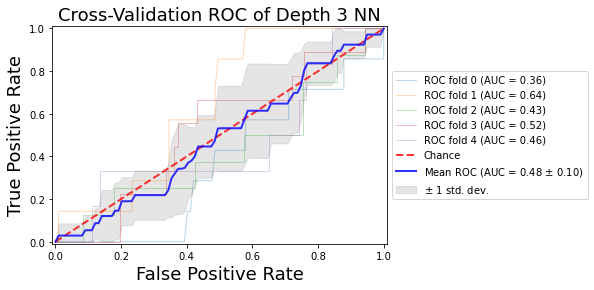

In [16]:
from sklearn.metrics import roc_auc_score
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

#for i in range(5):
    
    # K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d3 = translate_to_graph(testData_d3_MWPM, targets[test], mlb_d3)
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model

    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
    
############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
"""
plt.rcParams.update({'font.size': 22})

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3.values,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)"""

In [ ]:
"""
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')"""

In [ ]:
"""
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')"""

In [ ]:
"""
start = time.time()
predictions_d3 = model.predict(x_test_d3.values)
end = time.time()
print("Time: " + str(end - start))
# predict

thresholds=[0.1, .2, .3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d3.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0

    precision = precision_score(Y_test_d3, pred, average='micro')
    recall = recall_score(Y_test_d3, pred, average='micro')
    f1 = f1_score(Y_test_d3, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d3, pred))
    print("Partial Accuracy = ",partial_accuracy(Y_test_d3, pred))
    print("\n")"""

------------------------------------------------------------------------
Training for fold 6 ...
Train on 1665 samples, validate on 555 samples
Epoch 1/800
1665/1665 [==============================] - 0s 185us/step - loss: 0.6456 - accuracy: 0.7532 - val_loss: 0.5748 - val_accuracy: 0.8553
Epoch 2/800
1665/1665 [==============================] - 0s 96us/step - loss: 0.3547 - accuracy: 0.9357 - val_loss: 0.2544 - val_accuracy: 0.9327
Epoch 3/800
1665/1665 [==============================] - 0s 102us/step - loss: 0.1926 - accuracy: 0.9534 - val_loss: 0.2502 - val_accuracy: 0.9327
Epoch 4/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.1890 - accuracy: 0.9534 - val_loss: 0.2503 - val_accuracy: 0.9327
Epoch 5/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.1882 - accuracy: 0.9534 - val_loss: 0.2496 - val_accuracy: 0.9327
Epoch 6/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.1879 - accuracy: 0.9534 - val_loss: 0.249

1665/1665 [==============================] - 0s 118us/step - loss: 0.1572 - accuracy: 0.9536 - val_loss: 0.2048 - val_accuracy: 0.9332
Epoch 111/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.1566 - accuracy: 0.9536 - val_loss: 0.2041 - val_accuracy: 0.9333
Epoch 112/800
1665/1665 [==============================] - 0s 107us/step - loss: 0.1560 - accuracy: 0.9537 - val_loss: 0.2028 - val_accuracy: 0.9334
Epoch 113/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.1554 - accuracy: 0.9537 - val_loss: 0.2023 - val_accuracy: 0.9337
Epoch 114/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.1547 - accuracy: 0.9538 - val_loss: 0.2015 - val_accuracy: 0.9333
Epoch 115/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.1542 - accuracy: 0.9537 - val_loss: 0.1995 - val_accuracy: 0.9334
Epoch 116/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1535 - accuracy: 0.9538 - val_loss: 0

1665/1665 [==============================] - 0s 123us/step - loss: 0.1257 - accuracy: 0.9581 - val_loss: 0.1661 - val_accuracy: 0.9390
Epoch 166/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.1251 - accuracy: 0.9582 - val_loss: 0.1638 - val_accuracy: 0.9400
Epoch 167/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.1247 - accuracy: 0.9582 - val_loss: 0.1636 - val_accuracy: 0.9398
Epoch 168/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1242 - accuracy: 0.9585 - val_loss: 0.1636 - val_accuracy: 0.9389
Epoch 169/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.1237 - accuracy: 0.9583 - val_loss: 0.1616 - val_accuracy: 0.9407
Epoch 170/800
1665/1665 [==============================] - 0s 107us/step - loss: 0.1232 - accuracy: 0.9584 - val_loss: 0.1642 - val_accuracy: 0.9394
Epoch 171/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1228 - accuracy: 0.9585 - val_loss: 0

1665/1665 [==============================] - 0s 124us/step - loss: 0.1032 - accuracy: 0.9652 - val_loss: 0.1431 - val_accuracy: 0.9461
Epoch 221/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.1031 - accuracy: 0.9654 - val_loss: 0.1432 - val_accuracy: 0.9467
Epoch 222/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.1025 - accuracy: 0.9659 - val_loss: 0.1423 - val_accuracy: 0.9458
Epoch 223/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.1024 - accuracy: 0.9654 - val_loss: 0.1429 - val_accuracy: 0.9462
Epoch 224/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.1021 - accuracy: 0.9655 - val_loss: 0.1432 - val_accuracy: 0.9471
Epoch 225/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.1017 - accuracy: 0.9661 - val_loss: 0.1424 - val_accuracy: 0.9473
Epoch 226/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.1015 - accuracy: 0.9660 - val_loss: 0

1665/1665 [==============================] - 0s 113us/step - loss: 0.0907 - accuracy: 0.9692 - val_loss: 0.1349 - val_accuracy: 0.9502
Epoch 276/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0903 - accuracy: 0.9690 - val_loss: 0.1535 - val_accuracy: 0.9425
Epoch 277/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.0908 - accuracy: 0.9688 - val_loss: 0.1345 - val_accuracy: 0.9505
Epoch 278/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0899 - accuracy: 0.9692 - val_loss: 0.1441 - val_accuracy: 0.9458
Epoch 279/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0903 - accuracy: 0.9692 - val_loss: 0.1368 - val_accuracy: 0.9501
Epoch 280/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.0896 - accuracy: 0.9692 - val_loss: 0.1351 - val_accuracy: 0.9503
Epoch 281/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0894 - accuracy: 0.9697 - val_loss: 0

1665/1665 [==============================] - 0s 144us/step - loss: 0.0829 - accuracy: 0.9714 - val_loss: 0.1296 - val_accuracy: 0.9523
Epoch 331/800
1665/1665 [==============================] - 0s 152us/step - loss: 0.0825 - accuracy: 0.9716 - val_loss: 0.1311 - val_accuracy: 0.9522
Epoch 332/800
1665/1665 [==============================] - 0s 145us/step - loss: 0.0826 - accuracy: 0.9714 - val_loss: 0.1313 - val_accuracy: 0.9525
Epoch 333/800
1665/1665 [==============================] - 0s 148us/step - loss: 0.0826 - accuracy: 0.9713 - val_loss: 0.1305 - val_accuracy: 0.9525
Epoch 334/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0824 - accuracy: 0.9716 - val_loss: 0.1319 - val_accuracy: 0.9518
Epoch 335/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0823 - accuracy: 0.9715 - val_loss: 0.1296 - val_accuracy: 0.9530
Epoch 336/800
1665/1665 [==============================] - 0s 154us/step - loss: 0.0820 - accuracy: 0.9719 - val_loss: 0

1665/1665 [==============================] - 0s 128us/step - loss: 0.0773 - accuracy: 0.9731 - val_loss: 0.1258 - val_accuracy: 0.9536
Epoch 386/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0771 - accuracy: 0.9734 - val_loss: 0.1262 - val_accuracy: 0.9534
Epoch 387/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0769 - accuracy: 0.9732 - val_loss: 0.1261 - val_accuracy: 0.9541
Epoch 388/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0769 - accuracy: 0.9733 - val_loss: 0.1250 - val_accuracy: 0.9540
Epoch 389/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0768 - accuracy: 0.9733 - val_loss: 0.1275 - val_accuracy: 0.9531
Epoch 390/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0769 - accuracy: 0.9732 - val_loss: 0.1271 - val_accuracy: 0.9544
Epoch 391/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0767 - accuracy: 0.9733 - val_loss: 0

1665/1665 [==============================] - 0s 130us/step - loss: 0.0721 - accuracy: 0.9747 - val_loss: 0.1217 - val_accuracy: 0.9556
Epoch 441/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0722 - accuracy: 0.9748 - val_loss: 0.1208 - val_accuracy: 0.9563
Epoch 442/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.0724 - accuracy: 0.9748 - val_loss: 0.1219 - val_accuracy: 0.9559
Epoch 443/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0721 - accuracy: 0.9749 - val_loss: 0.1216 - val_accuracy: 0.9563
Epoch 444/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0720 - accuracy: 0.9751 - val_loss: 0.1216 - val_accuracy: 0.9556
Epoch 445/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0719 - accuracy: 0.9750 - val_loss: 0.1226 - val_accuracy: 0.9555
Epoch 446/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0717 - accuracy: 0.9750 - val_loss: 0

1665/1665 [==============================] - 0s 117us/step - loss: 0.0678 - accuracy: 0.9760 - val_loss: 0.1266 - val_accuracy: 0.9536
Epoch 496/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0683 - accuracy: 0.9759 - val_loss: 0.1166 - val_accuracy: 0.9579
Epoch 497/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0679 - accuracy: 0.9759 - val_loss: 0.1261 - val_accuracy: 0.9538
Epoch 498/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0683 - accuracy: 0.9761 - val_loss: 0.1168 - val_accuracy: 0.9575
Epoch 499/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0677 - accuracy: 0.9761 - val_loss: 0.1178 - val_accuracy: 0.9568
Epoch 500/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0676 - accuracy: 0.9764 - val_loss: 0.1589 - val_accuracy: 0.9470
Epoch 501/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0691 - accuracy: 0.9756 - val_loss: 0

1665/1665 [==============================] - 0s 141us/step - loss: 0.0641 - accuracy: 0.9772 - val_loss: 0.1125 - val_accuracy: 0.9585
Epoch 551/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0639 - accuracy: 0.9772 - val_loss: 0.1120 - val_accuracy: 0.9590
Epoch 552/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0639 - accuracy: 0.9773 - val_loss: 0.1477 - val_accuracy: 0.9496
Epoch 553/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0658 - accuracy: 0.9769 - val_loss: 0.1117 - val_accuracy: 0.9595
Epoch 554/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0639 - accuracy: 0.9773 - val_loss: 0.1116 - val_accuracy: 0.9589
Epoch 555/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0637 - accuracy: 0.9772 - val_loss: 0.1154 - val_accuracy: 0.9592
Epoch 556/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.0638 - accuracy: 0.9774 - val_loss: 0

1665/1665 [==============================] - 0s 147us/step - loss: 0.0609 - accuracy: 0.9780 - val_loss: 0.1095 - val_accuracy: 0.9597
Epoch 606/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0609 - accuracy: 0.9782 - val_loss: 0.1101 - val_accuracy: 0.9589
Epoch 607/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0608 - accuracy: 0.9782 - val_loss: 0.1109 - val_accuracy: 0.9582
Epoch 608/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.0609 - accuracy: 0.9781 - val_loss: 0.1089 - val_accuracy: 0.9594
Epoch 609/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0606 - accuracy: 0.9783 - val_loss: 0.1108 - val_accuracy: 0.9588
Epoch 610/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0608 - accuracy: 0.9782 - val_loss: 0.1099 - val_accuracy: 0.9588
Epoch 611/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.0606 - accuracy: 0.9781 - val_loss: 0

1665/1665 [==============================] - 0s 140us/step - loss: 0.0593 - accuracy: 0.9783 - val_loss: 0.1259 - val_accuracy: 0.9545
Epoch 661/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.0595 - accuracy: 0.9787 - val_loss: 0.1053 - val_accuracy: 0.9611
Epoch 662/800
1665/1665 [==============================] - 0s 138us/step - loss: 0.0582 - accuracy: 0.9789 - val_loss: 0.1092 - val_accuracy: 0.9605
Epoch 663/800
1665/1665 [==============================] - 0s 139us/step - loss: 0.0582 - accuracy: 0.9788 - val_loss: 0.1094 - val_accuracy: 0.9598
Epoch 664/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0581 - accuracy: 0.9791 - val_loss: 0.1056 - val_accuracy: 0.9607
Epoch 665/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0580 - accuracy: 0.9788 - val_loss: 0.1058 - val_accuracy: 0.9613
Epoch 666/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0579 - accuracy: 0.9791 - val_loss: 0

1665/1665 [==============================] - 0s 119us/step - loss: 0.0560 - accuracy: 0.9795 - val_loss: 0.1071 - val_accuracy: 0.9614
Epoch 716/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0559 - accuracy: 0.9795 - val_loss: 0.1038 - val_accuracy: 0.9617
Epoch 717/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0554 - accuracy: 0.9795 - val_loss: 0.1064 - val_accuracy: 0.9612
Epoch 718/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.0556 - accuracy: 0.9797 - val_loss: 0.1059 - val_accuracy: 0.9616
Epoch 719/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0558 - accuracy: 0.9794 - val_loss: 0.1048 - val_accuracy: 0.9620
Epoch 720/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0555 - accuracy: 0.9798 - val_loss: 0.1057 - val_accuracy: 0.9617
Epoch 721/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0554 - accuracy: 0.9797 - val_loss: 0

1665/1665 [==============================] - 0s 124us/step - loss: 0.0532 - accuracy: 0.9800 - val_loss: 0.1032 - val_accuracy: 0.9627
Epoch 771/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0532 - accuracy: 0.9803 - val_loss: 0.1050 - val_accuracy: 0.9628
Epoch 772/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0536 - accuracy: 0.9799 - val_loss: 0.1012 - val_accuracy: 0.9631
Epoch 773/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0532 - accuracy: 0.9802 - val_loss: 0.1039 - val_accuracy: 0.9626
Epoch 774/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0530 - accuracy: 0.9805 - val_loss: 0.1027 - val_accuracy: 0.9629
Epoch 775/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0531 - accuracy: 0.9804 - val_loss: 0.1023 - val_accuracy: 0.9630
Epoch 776/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0530 - accuracy: 0.9802 - val_loss: 0

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 7 ...
Train on 1665 samples, validate on 556 samples
Epoch 1/800
1665/1665 [==============================] - 0s 192us/step - loss: 0.6526 - accuracy: 0.7601 - val_loss: 0.5980 - val_accuracy: 0.8752
Epoch 2/800
1665/1665 [==============================] - 0s 106us/step - loss: 0.4028 - accuracy: 0.9251 - val_loss: 0.2653 - val_accuracy: 0.9325
Epoch 3/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.1934 - accuracy: 0.9537 - val_loss: 0.2521 - val_accuracy: 0.9325
Epoch 4/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1874 - accuracy: 0.9537 - val_loss: 0.2509 - val_accuracy: 0.9325
Epoch 5/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.1865 - accuracy: 0.9537 - val_loss: 0.2507 - val_accuracy: 0.9325
Epoch 6/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.1861 - accuracy: 0.9537 - val_loss: 0.25

1665/1665 [==============================] - 0s 115us/step - loss: 0.1649 - accuracy: 0.9538 - val_loss: 0.2197 - val_accuracy: 0.9325
Epoch 111/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1642 - accuracy: 0.9538 - val_loss: 0.2188 - val_accuracy: 0.9326
Epoch 112/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1636 - accuracy: 0.9538 - val_loss: 0.2180 - val_accuracy: 0.9326
Epoch 113/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.1630 - accuracy: 0.9538 - val_loss: 0.2180 - val_accuracy: 0.9327
Epoch 114/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1625 - accuracy: 0.9538 - val_loss: 0.2163 - val_accuracy: 0.9328
Epoch 115/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.1619 - accuracy: 0.9538 - val_loss: 0.2155 - val_accuracy: 0.9328
Epoch 116/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1613 - accuracy: 0.9538 - val_loss: 0

1665/1665 [==============================] - 0s 149us/step - loss: 0.1363 - accuracy: 0.9561 - val_loss: 0.1854 - val_accuracy: 0.9356
Epoch 166/800
1665/1665 [==============================] - 0s 149us/step - loss: 0.1359 - accuracy: 0.9563 - val_loss: 0.1855 - val_accuracy: 0.9355
Epoch 167/800
1665/1665 [==============================] - 0s 164us/step - loss: 0.1355 - accuracy: 0.9563 - val_loss: 0.1848 - val_accuracy: 0.9359
Epoch 168/800
1665/1665 [==============================] - 0s 168us/step - loss: 0.1350 - accuracy: 0.9564 - val_loss: 0.1837 - val_accuracy: 0.9359
Epoch 169/800
1665/1665 [==============================] - 0s 155us/step - loss: 0.1346 - accuracy: 0.9565 - val_loss: 0.1846 - val_accuracy: 0.9353
Epoch 170/800
1665/1665 [==============================] - 0s 144us/step - loss: 0.1342 - accuracy: 0.9563 - val_loss: 0.1832 - val_accuracy: 0.9360
Epoch 171/800
1665/1665 [==============================] - 0s 144us/step - loss: 0.1338 - accuracy: 0.9565 - val_loss: 0

1665/1665 [==============================] - 0s 122us/step - loss: 0.1000 - accuracy: 0.9652 - val_loss: 0.1484 - val_accuracy: 0.9440
Epoch 275/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.1001 - accuracy: 0.9650 - val_loss: 0.1472 - val_accuracy: 0.9453
Epoch 276/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0997 - accuracy: 0.9653 - val_loss: 0.1479 - val_accuracy: 0.9445
Epoch 277/800
1665/1665 [==============================] - 0s 145us/step - loss: 0.0996 - accuracy: 0.9653 - val_loss: 0.1488 - val_accuracy: 0.9446
Epoch 278/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0994 - accuracy: 0.9654 - val_loss: 0.1487 - val_accuracy: 0.9449
Epoch 279/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0990 - accuracy: 0.9654 - val_loss: 0.1480 - val_accuracy: 0.9433
Epoch 280/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0990 - accuracy: 0.9653 - val_loss: 0

1665/1665 [==============================] - 0s 115us/step - loss: 0.0911 - accuracy: 0.9685 - val_loss: 0.1420 - val_accuracy: 0.9464
Epoch 330/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0911 - accuracy: 0.9686 - val_loss: 0.1431 - val_accuracy: 0.9476
Epoch 331/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0909 - accuracy: 0.9686 - val_loss: 0.1426 - val_accuracy: 0.9475
Epoch 332/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0908 - accuracy: 0.9687 - val_loss: 0.1518 - val_accuracy: 0.9440
Epoch 333/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0911 - accuracy: 0.9685 - val_loss: 0.1423 - val_accuracy: 0.9477
Epoch 334/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0905 - accuracy: 0.9688 - val_loss: 0.1471 - val_accuracy: 0.9454
Epoch 335/800
1665/1665 [==============================] - 0s 177us/step - loss: 0.0907 - accuracy: 0.9689 - val_loss: 0

1665/1665 [==============================] - 0s 152us/step - loss: 0.0837 - accuracy: 0.9713 - val_loss: 0.1510 - val_accuracy: 0.9449
Epoch 385/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.0842 - accuracy: 0.9711 - val_loss: 0.1367 - val_accuracy: 0.9510
Epoch 386/800
1665/1665 [==============================] - 0s 155us/step - loss: 0.0834 - accuracy: 0.9711 - val_loss: 0.1402 - val_accuracy: 0.9498
Epoch 387/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0836 - accuracy: 0.9710 - val_loss: 0.1407 - val_accuracy: 0.9497
Epoch 388/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.0833 - accuracy: 0.9713 - val_loss: 0.1366 - val_accuracy: 0.9509
Epoch 389/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0831 - accuracy: 0.9714 - val_loss: 0.1378 - val_accuracy: 0.9503
Epoch 390/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0830 - accuracy: 0.9712 - val_loss: 0

1665/1665 [==============================] - 0s 116us/step - loss: 0.0778 - accuracy: 0.9729 - val_loss: 0.1313 - val_accuracy: 0.9530
Epoch 440/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0777 - accuracy: 0.9730 - val_loss: 0.1316 - val_accuracy: 0.9526
Epoch 441/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0779 - accuracy: 0.9730 - val_loss: 0.1311 - val_accuracy: 0.9523
Epoch 442/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0775 - accuracy: 0.9731 - val_loss: 0.1314 - val_accuracy: 0.9533
Epoch 443/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0775 - accuracy: 0.9729 - val_loss: 0.1477 - val_accuracy: 0.9461
Epoch 444/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0782 - accuracy: 0.9725 - val_loss: 0.1316 - val_accuracy: 0.9530
Epoch 445/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0771 - accuracy: 0.9733 - val_loss: 0

1665/1665 [==============================] - 0s 120us/step - loss: 0.0733 - accuracy: 0.9740 - val_loss: 0.1300 - val_accuracy: 0.9537
Epoch 495/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.1270 - val_accuracy: 0.9543
Epoch 496/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.1329 - val_accuracy: 0.9526
Epoch 497/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0735 - accuracy: 0.9739 - val_loss: 0.1362 - val_accuracy: 0.9505
Epoch 498/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0734 - accuracy: 0.9741 - val_loss: 0.1478 - val_accuracy: 0.9459
Epoch 499/800
1665/1665 [==============================] - 0s 152us/step - loss: 0.0737 - accuracy: 0.9738 - val_loss: 0.1273 - val_accuracy: 0.9541
Epoch 500/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0729 - accuracy: 0.9739 - val_loss: 0

1665/1665 [==============================] - 0s 113us/step - loss: 0.0689 - accuracy: 0.9753 - val_loss: 0.1235 - val_accuracy: 0.9569
Epoch 550/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0690 - accuracy: 0.9754 - val_loss: 0.1266 - val_accuracy: 0.9556
Epoch 551/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0688 - accuracy: 0.9754 - val_loss: 0.1412 - val_accuracy: 0.9502
Epoch 552/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0694 - accuracy: 0.9753 - val_loss: 0.1243 - val_accuracy: 0.9566
Epoch 553/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0688 - accuracy: 0.9754 - val_loss: 0.1250 - val_accuracy: 0.9559
Epoch 554/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0687 - accuracy: 0.9754 - val_loss: 0.1242 - val_accuracy: 0.9560
Epoch 555/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0685 - accuracy: 0.9755 - val_loss: 0

1665/1665 [==============================] - 0s 142us/step - loss: 0.0651 - accuracy: 0.9764 - val_loss: 0.1209 - val_accuracy: 0.9576
Epoch 605/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0648 - accuracy: 0.9762 - val_loss: 0.1205 - val_accuracy: 0.9580
Epoch 606/800
1665/1665 [==============================] - 0s 141us/step - loss: 0.0646 - accuracy: 0.9766 - val_loss: 0.1231 - val_accuracy: 0.9572
Epoch 607/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.0649 - accuracy: 0.9762 - val_loss: 0.1211 - val_accuracy: 0.9577
Epoch 608/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.0645 - accuracy: 0.9765 - val_loss: 0.1207 - val_accuracy: 0.9582
Epoch 609/800
1665/1665 [==============================] - 0s 152us/step - loss: 0.0645 - accuracy: 0.9764 - val_loss: 0.1200 - val_accuracy: 0.9578
Epoch 610/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.0644 - accuracy: 0.9767 - val_loss: 0

1665/1665 [==============================] - 0s 168us/step - loss: 0.0619 - accuracy: 0.9771 - val_loss: 0.1182 - val_accuracy: 0.9588
Epoch 660/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0612 - accuracy: 0.9775 - val_loss: 0.1204 - val_accuracy: 0.9593
Epoch 661/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0611 - accuracy: 0.9775 - val_loss: 0.1182 - val_accuracy: 0.9592
Epoch 662/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.0611 - accuracy: 0.9775 - val_loss: 0.1301 - val_accuracy: 0.9549
Epoch 663/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0615 - accuracy: 0.9772 - val_loss: 0.1178 - val_accuracy: 0.9607
Epoch 664/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0607 - accuracy: 0.9773 - val_loss: 0.1606 - val_accuracy: 0.9439
Epoch 665/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0626 - accuracy: 0.9768 - val_loss: 0

1665/1665 [==============================] - 0s 111us/step - loss: 0.0578 - accuracy: 0.9785 - val_loss: 0.1159 - val_accuracy: 0.9600
Epoch 715/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0578 - accuracy: 0.9786 - val_loss: 0.1153 - val_accuracy: 0.9602
Epoch 716/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0577 - accuracy: 0.9785 - val_loss: 0.1166 - val_accuracy: 0.9601
Epoch 717/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0578 - accuracy: 0.9783 - val_loss: 0.1175 - val_accuracy: 0.9607
Epoch 718/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0577 - accuracy: 0.9783 - val_loss: 0.1282 - val_accuracy: 0.9546
Epoch 719/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0582 - accuracy: 0.9781 - val_loss: 0.1167 - val_accuracy: 0.9601
Epoch 720/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0576 - accuracy: 0.9788 - val_loss: 0

1665/1665 [==============================] - 0s 125us/step - loss: 0.0552 - accuracy: 0.9793 - val_loss: 0.1135 - val_accuracy: 0.9619
Epoch 770/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0551 - accuracy: 0.9794 - val_loss: 0.1157 - val_accuracy: 0.9611
Epoch 771/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0549 - accuracy: 0.9794 - val_loss: 0.1176 - val_accuracy: 0.9602
Epoch 772/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0551 - accuracy: 0.9792 - val_loss: 0.1149 - val_accuracy: 0.9613
Epoch 773/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0549 - accuracy: 0.9795 - val_loss: 0.1143 - val_accuracy: 0.9604
Epoch 774/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0549 - accuracy: 0.9794 - val_loss: 0.1143 - val_accuracy: 0.9614
Epoch 775/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0548 - accuracy: 0.9795 - val_loss: 0

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 8 ...
Train on 1665 samples, validate on 556 samples
Epoch 1/800
1665/1665 [==============================] - 0s 240us/step - loss: 0.6665 - accuracy: 0.7533 - val_loss: 0.6346 - val_accuracy: 0.8244
Epoch 2/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.5210 - accuracy: 0.8809 - val_loss: 0.3470 - val_accuracy: 0.9329
Epoch 3/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.2172 - accuracy: 0.9538 - val_loss: 0.2504 - val_accuracy: 0.9329
Epoch 4/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1888 - accuracy: 0.9538 - val_loss: 0.2494 - val_accuracy: 0.9329
Epoch 5/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.1870 - accuracy: 0.9538 - val_loss: 0.2489 - val_accuracy: 0.9329
Epoch 6/800
1665/1665 [==============================] - 0s 136us/step - loss: 0.1865 - accuracy: 0.9538 - val_loss: 0.24

1665/1665 [==============================] - 0s 120us/step - loss: 0.1683 - accuracy: 0.9538 - val_loss: 0.2232 - val_accuracy: 0.9330
Epoch 111/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.1680 - accuracy: 0.9538 - val_loss: 0.2228 - val_accuracy: 0.9330
Epoch 112/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.1677 - accuracy: 0.9538 - val_loss: 0.2215 - val_accuracy: 0.9329
Epoch 113/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.1673 - accuracy: 0.9538 - val_loss: 0.2218 - val_accuracy: 0.9330
Epoch 114/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.1670 - accuracy: 0.9538 - val_loss: 0.2220 - val_accuracy: 0.9334
Epoch 115/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.1666 - accuracy: 0.9538 - val_loss: 0.2206 - val_accuracy: 0.9329
Epoch 116/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.1662 - accuracy: 0.9538 - val_loss: 0

1665/1665 [==============================] - 0s 115us/step - loss: 0.1415 - accuracy: 0.9550 - val_loss: 0.1891 - val_accuracy: 0.9345
Epoch 166/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1408 - accuracy: 0.9552 - val_loss: 0.1877 - val_accuracy: 0.9350
Epoch 167/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1403 - accuracy: 0.9552 - val_loss: 0.1874 - val_accuracy: 0.9344
Epoch 168/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.1398 - accuracy: 0.9554 - val_loss: 0.1858 - val_accuracy: 0.9350
Epoch 169/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.1392 - accuracy: 0.9555 - val_loss: 0.1856 - val_accuracy: 0.9354
Epoch 170/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.1387 - accuracy: 0.9555 - val_loss: 0.1851 - val_accuracy: 0.9344
Epoch 171/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.1381 - accuracy: 0.9556 - val_loss: 0

1665/1665 [==============================] - 0s 125us/step - loss: 0.1170 - accuracy: 0.9604 - val_loss: 0.1603 - val_accuracy: 0.9410
Epoch 221/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.1167 - accuracy: 0.9602 - val_loss: 0.1611 - val_accuracy: 0.9394
Epoch 222/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.1164 - accuracy: 0.9605 - val_loss: 0.1587 - val_accuracy: 0.9410
Epoch 223/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.1160 - accuracy: 0.9606 - val_loss: 0.1593 - val_accuracy: 0.9408
Epoch 224/800
1665/1665 [==============================] - 0s 146us/step - loss: 0.1157 - accuracy: 0.9605 - val_loss: 0.1580 - val_accuracy: 0.9415
Epoch 225/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.1154 - accuracy: 0.9606 - val_loss: 0.1577 - val_accuracy: 0.9414
Epoch 226/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.1152 - accuracy: 0.9607 - val_loss: 0

1665/1665 [==============================] - 0s 119us/step - loss: 0.1021 - accuracy: 0.9647 - val_loss: 0.1473 - val_accuracy: 0.9445
Epoch 276/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.1019 - accuracy: 0.9650 - val_loss: 0.1472 - val_accuracy: 0.9455
Epoch 277/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.1016 - accuracy: 0.9650 - val_loss: 0.1467 - val_accuracy: 0.9452
Epoch 278/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.1014 - accuracy: 0.9651 - val_loss: 0.1454 - val_accuracy: 0.9453
Epoch 279/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.1011 - accuracy: 0.9651 - val_loss: 0.1601 - val_accuracy: 0.9377
Epoch 280/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.1017 - accuracy: 0.9648 - val_loss: 0.1458 - val_accuracy: 0.9446
Epoch 281/800
1665/1665 [==============================] - 0s 157us/step - loss: 0.1008 - accuracy: 0.9653 - val_loss: 0

1665/1665 [==============================] - 0s 194us/step - loss: 0.0911 - accuracy: 0.9685 - val_loss: 0.1385 - val_accuracy: 0.9481
Epoch 331/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.0910 - accuracy: 0.9686 - val_loss: 0.1531 - val_accuracy: 0.9415
Epoch 332/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.0914 - accuracy: 0.9686 - val_loss: 0.1370 - val_accuracy: 0.9473
Epoch 333/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0904 - accuracy: 0.9687 - val_loss: 0.1406 - val_accuracy: 0.9475
Epoch 334/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.0903 - accuracy: 0.9686 - val_loss: 0.1391 - val_accuracy: 0.9477
Epoch 335/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.0901 - accuracy: 0.9690 - val_loss: 0.1377 - val_accuracy: 0.9477
Epoch 336/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0899 - accuracy: 0.9692 - val_loss: 0

1665/1665 [==============================] - 0s 123us/step - loss: 0.0832 - accuracy: 0.9710 - val_loss: 0.1345 - val_accuracy: 0.9493
Epoch 386/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0830 - accuracy: 0.9710 - val_loss: 0.1329 - val_accuracy: 0.9498
Epoch 387/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.0828 - accuracy: 0.9710 - val_loss: 0.1319 - val_accuracy: 0.9496
Epoch 388/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0829 - accuracy: 0.9708 - val_loss: 0.1345 - val_accuracy: 0.9497
Epoch 389/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0827 - accuracy: 0.9710 - val_loss: 0.1333 - val_accuracy: 0.9494
Epoch 390/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.0826 - accuracy: 0.9712 - val_loss: 0.1382 - val_accuracy: 0.9474
Epoch 391/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0826 - accuracy: 0.9711 - val_loss: 0

1665/1665 [==============================] - 0s 145us/step - loss: 0.0772 - accuracy: 0.9724 - val_loss: 0.1291 - val_accuracy: 0.9519
Epoch 441/800
1665/1665 [==============================] - 0s 145us/step - loss: 0.0768 - accuracy: 0.9727 - val_loss: 0.1287 - val_accuracy: 0.9521
Epoch 442/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0768 - accuracy: 0.9724 - val_loss: 0.1309 - val_accuracy: 0.9525
Epoch 443/800
1665/1665 [==============================] - 0s 165us/step - loss: 0.0770 - accuracy: 0.9724 - val_loss: 0.1304 - val_accuracy: 0.9515
Epoch 444/800
1665/1665 [==============================] - 0s 147us/step - loss: 0.0767 - accuracy: 0.9727 - val_loss: 0.1281 - val_accuracy: 0.9517
Epoch 445/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0766 - accuracy: 0.9727 - val_loss: 0.1274 - val_accuracy: 0.9511
Epoch 446/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0767 - accuracy: 0.9725 - val_loss: 0

1665/1665 [==============================] - 0s 130us/step - loss: 0.0723 - accuracy: 0.9738 - val_loss: 0.1250 - val_accuracy: 0.9537
Epoch 496/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0718 - accuracy: 0.9737 - val_loss: 0.1297 - val_accuracy: 0.9537
Epoch 497/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0721 - accuracy: 0.9740 - val_loss: 0.1275 - val_accuracy: 0.9534
Epoch 498/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0717 - accuracy: 0.9739 - val_loss: 0.1267 - val_accuracy: 0.9533
Epoch 499/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0718 - accuracy: 0.9739 - val_loss: 0.1255 - val_accuracy: 0.9533
Epoch 500/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.0716 - accuracy: 0.9741 - val_loss: 0.1237 - val_accuracy: 0.9538
Epoch 501/800
1665/1665 [==============================] - 0s 139us/step - loss: 0.0714 - accuracy: 0.9741 - val_loss: 0

1665/1665 [==============================] - 0s 112us/step - loss: 0.0677 - accuracy: 0.9751 - val_loss: 0.1218 - val_accuracy: 0.9551
Epoch 551/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.0676 - accuracy: 0.9752 - val_loss: 0.1205 - val_accuracy: 0.9561
Epoch 552/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0676 - accuracy: 0.9752 - val_loss: 0.1242 - val_accuracy: 0.9549
Epoch 553/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0676 - accuracy: 0.9751 - val_loss: 0.1240 - val_accuracy: 0.9547
Epoch 554/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0676 - accuracy: 0.9750 - val_loss: 0.1175 - val_accuracy: 0.9558
Epoch 555/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0674 - accuracy: 0.9755 - val_loss: 0.1207 - val_accuracy: 0.9556
Epoch 556/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0671 - accuracy: 0.9752 - val_loss: 0

1665/1665 [==============================] - 0s 119us/step - loss: 0.0638 - accuracy: 0.9762 - val_loss: 0.1201 - val_accuracy: 0.9561
Epoch 606/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0640 - accuracy: 0.9759 - val_loss: 0.1188 - val_accuracy: 0.9567
Epoch 607/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0639 - accuracy: 0.9762 - val_loss: 0.1176 - val_accuracy: 0.9569
Epoch 608/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0639 - accuracy: 0.9763 - val_loss: 0.1161 - val_accuracy: 0.9568
Epoch 609/800
1665/1665 [==============================] - 0s 147us/step - loss: 0.0635 - accuracy: 0.9763 - val_loss: 0.1169 - val_accuracy: 0.9575
Epoch 610/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.0634 - accuracy: 0.9762 - val_loss: 0.1174 - val_accuracy: 0.9571
Epoch 611/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0636 - accuracy: 0.9763 - val_loss: 0

1665/1665 [==============================] - 0s 131us/step - loss: 0.0606 - accuracy: 0.9769 - val_loss: 0.1308 - val_accuracy: 0.9538
Epoch 661/800
1665/1665 [==============================] - 0s 149us/step - loss: 0.0612 - accuracy: 0.9768 - val_loss: 0.1153 - val_accuracy: 0.9582
Epoch 662/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0607 - accuracy: 0.9771 - val_loss: 0.1211 - val_accuracy: 0.9561
Epoch 663/800
1665/1665 [==============================] - 0s 150us/step - loss: 0.0607 - accuracy: 0.9770 - val_loss: 0.1414 - val_accuracy: 0.9473
Epoch 664/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0623 - accuracy: 0.9762 - val_loss: 0.1362 - val_accuracy: 0.9517
Epoch 665/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.0612 - accuracy: 0.9766 - val_loss: 0.1120 - val_accuracy: 0.9585
Epoch 666/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0605 - accuracy: 0.9770 - val_loss: 0

1665/1665 [==============================] - 0s 133us/step - loss: 0.0577 - accuracy: 0.9781 - val_loss: 0.1136 - val_accuracy: 0.9590
Epoch 716/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0579 - accuracy: 0.9779 - val_loss: 0.1149 - val_accuracy: 0.9579
Epoch 717/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0581 - accuracy: 0.9777 - val_loss: 0.1078 - val_accuracy: 0.9601
Epoch 718/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0576 - accuracy: 0.9778 - val_loss: 0.1140 - val_accuracy: 0.9587
Epoch 719/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.0578 - accuracy: 0.9780 - val_loss: 0.1124 - val_accuracy: 0.9594
Epoch 720/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.0579 - accuracy: 0.9778 - val_loss: 0.1112 - val_accuracy: 0.9597
Epoch 721/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0578 - accuracy: 0.9778 - val_loss: 0

1665/1665 [==============================] - 0s 144us/step - loss: 0.0555 - accuracy: 0.9786 - val_loss: 0.1109 - val_accuracy: 0.9602
Epoch 771/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.0555 - accuracy: 0.9784 - val_loss: 0.1087 - val_accuracy: 0.9612
Epoch 772/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.0552 - accuracy: 0.9786 - val_loss: 0.1103 - val_accuracy: 0.9597
Epoch 773/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0555 - accuracy: 0.9786 - val_loss: 0.1305 - val_accuracy: 0.9502
Epoch 774/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0565 - accuracy: 0.9782 - val_loss: 0.1130 - val_accuracy: 0.9596
Epoch 775/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.0554 - accuracy: 0.9787 - val_loss: 0.1234 - val_accuracy: 0.9573
Epoch 776/800
1665/1665 [==============================] - 0s 143us/step - loss: 0.0557 - accuracy: 0.9785 - val_loss: 0

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 9 ...
Train on 1665 samples, validate on 556 samples
Epoch 1/800
1665/1665 [==============================] - 0s 219us/step - loss: 0.6624 - accuracy: 0.7564 - val_loss: 0.6224 - val_accuracy: 0.8901
Epoch 2/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.4543 - accuracy: 0.9344 - val_loss: 0.2821 - val_accuracy: 0.9331
Epoch 3/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.1966 - accuracy: 0.9539 - val_loss: 0.2508 - val_accuracy: 0.9331
Epoch 4/800
1665/1665 [==============================] - 0s 140us/step - loss: 0.1878 - accuracy: 0.9539 - val_loss: 0.2502 - val_accuracy: 0.9331
Epoch 5/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.1869 - accuracy: 0.9539 - val_loss: 0.2499 - val_accuracy: 0.9331
Epoch 6/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.1864 - accuracy: 0.9539 - val_loss: 0.25

1665/1665 [==============================] - 0s 138us/step - loss: 0.1622 - accuracy: 0.9539 - val_loss: 0.2165 - val_accuracy: 0.9333
Epoch 111/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.1616 - accuracy: 0.9539 - val_loss: 0.2150 - val_accuracy: 0.9338
Epoch 112/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.1611 - accuracy: 0.9540 - val_loss: 0.2151 - val_accuracy: 0.9335
Epoch 113/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1605 - accuracy: 0.9539 - val_loss: 0.2136 - val_accuracy: 0.9332
Epoch 114/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.1600 - accuracy: 0.9539 - val_loss: 0.2131 - val_accuracy: 0.9338
Epoch 115/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.1594 - accuracy: 0.9540 - val_loss: 0.2127 - val_accuracy: 0.9335
Epoch 116/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.1588 - accuracy: 0.9540 - val_loss: 0

1665/1665 [==============================] - 0s 110us/step - loss: 0.1313 - accuracy: 0.9570 - val_loss: 0.1798 - val_accuracy: 0.9384
Epoch 166/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1307 - accuracy: 0.9570 - val_loss: 0.1798 - val_accuracy: 0.9385
Epoch 167/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1304 - accuracy: 0.9572 - val_loss: 0.1835 - val_accuracy: 0.9342
Epoch 168/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.1301 - accuracy: 0.9573 - val_loss: 0.1798 - val_accuracy: 0.9380
Epoch 169/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.1295 - accuracy: 0.9573 - val_loss: 0.1783 - val_accuracy: 0.9379
Epoch 170/800
1665/1665 [==============================] - 0s 109us/step - loss: 0.1287 - accuracy: 0.9574 - val_loss: 0.1777 - val_accuracy: 0.9387
Epoch 171/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1284 - accuracy: 0.9576 - val_loss: 0

1665/1665 [==============================] - 0s 117us/step - loss: 0.1093 - accuracy: 0.9618 - val_loss: 0.1578 - val_accuracy: 0.9420
Epoch 221/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.1089 - accuracy: 0.9622 - val_loss: 0.1570 - val_accuracy: 0.9417
Epoch 222/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1086 - accuracy: 0.9622 - val_loss: 0.1777 - val_accuracy: 0.9346
Epoch 223/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.1091 - accuracy: 0.9617 - val_loss: 0.1560 - val_accuracy: 0.9429
Epoch 224/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.1082 - accuracy: 0.9621 - val_loss: 0.1553 - val_accuracy: 0.9421
Epoch 225/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1079 - accuracy: 0.9623 - val_loss: 0.1555 - val_accuracy: 0.9416
Epoch 226/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.1074 - accuracy: 0.9624 - val_loss: 0

1665/1665 [==============================] - 0s 123us/step - loss: 0.0934 - accuracy: 0.9679 - val_loss: 0.1405 - val_accuracy: 0.9476
Epoch 276/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0932 - accuracy: 0.9677 - val_loss: 0.1404 - val_accuracy: 0.9474
Epoch 277/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0929 - accuracy: 0.9678 - val_loss: 0.1521 - val_accuracy: 0.9424
Epoch 278/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0931 - accuracy: 0.9677 - val_loss: 0.1406 - val_accuracy: 0.9472
Epoch 279/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0924 - accuracy: 0.9682 - val_loss: 0.1523 - val_accuracy: 0.9433
Epoch 280/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0926 - accuracy: 0.9678 - val_loss: 0.1400 - val_accuracy: 0.9487
Epoch 281/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0918 - accuracy: 0.9684 - val_loss: 0

1665/1665 [==============================] - 0s 110us/step - loss: 0.0830 - accuracy: 0.9709 - val_loss: 0.1313 - val_accuracy: 0.9508
Epoch 331/800
1665/1665 [==============================] - 0s 107us/step - loss: 0.0828 - accuracy: 0.9710 - val_loss: 0.1334 - val_accuracy: 0.9509
Epoch 332/800
1665/1665 [==============================] - 0s 106us/step - loss: 0.0827 - accuracy: 0.9708 - val_loss: 0.1497 - val_accuracy: 0.9453
Epoch 333/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0833 - accuracy: 0.9707 - val_loss: 0.1323 - val_accuracy: 0.9516
Epoch 334/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0824 - accuracy: 0.9711 - val_loss: 0.1315 - val_accuracy: 0.9507
Epoch 335/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.0823 - accuracy: 0.9709 - val_loss: 0.1313 - val_accuracy: 0.9510
Epoch 336/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.0822 - accuracy: 0.9710 - val_loss: 0

1665/1665 [==============================] - 0s 113us/step - loss: 0.0759 - accuracy: 0.9730 - val_loss: 0.1250 - val_accuracy: 0.9536
Epoch 386/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0758 - accuracy: 0.9728 - val_loss: 0.1246 - val_accuracy: 0.9542
Epoch 387/800
1665/1665 [==============================] - 0s 124us/step - loss: 0.0758 - accuracy: 0.9730 - val_loss: 0.1260 - val_accuracy: 0.9533
Epoch 388/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0758 - accuracy: 0.9727 - val_loss: 0.1235 - val_accuracy: 0.9542
Epoch 389/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0753 - accuracy: 0.9729 - val_loss: 0.1258 - val_accuracy: 0.9520
Epoch 390/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0755 - accuracy: 0.9730 - val_loss: 0.1262 - val_accuracy: 0.9548
Epoch 391/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0753 - accuracy: 0.9732 - val_loss: 0

1665/1665 [==============================] - 0s 162us/step - loss: 0.0704 - accuracy: 0.9743 - val_loss: 0.1207 - val_accuracy: 0.9560
Epoch 441/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0702 - accuracy: 0.9747 - val_loss: 0.1224 - val_accuracy: 0.9558
Epoch 442/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0702 - accuracy: 0.9746 - val_loss: 0.1205 - val_accuracy: 0.9558
Epoch 443/800
1665/1665 [==============================] - 0s 146us/step - loss: 0.0699 - accuracy: 0.9743 - val_loss: 0.1198 - val_accuracy: 0.9555
Epoch 444/800
1665/1665 [==============================] - 0s 154us/step - loss: 0.0700 - accuracy: 0.9746 - val_loss: 0.1219 - val_accuracy: 0.9561
Epoch 445/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0697 - accuracy: 0.9747 - val_loss: 0.1214 - val_accuracy: 0.9553
Epoch 446/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.0699 - accuracy: 0.9745 - val_loss: 0

1665/1665 [==============================] - 0s 139us/step - loss: 0.0661 - accuracy: 0.9756 - val_loss: 0.1156 - val_accuracy: 0.9571
Epoch 496/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0658 - accuracy: 0.9758 - val_loss: 0.1180 - val_accuracy: 0.9566
Epoch 497/800
1665/1665 [==============================] - 0s 138us/step - loss: 0.0660 - accuracy: 0.9756 - val_loss: 0.1250 - val_accuracy: 0.9541
Epoch 498/800
1665/1665 [==============================] - 0s 151us/step - loss: 0.0662 - accuracy: 0.9755 - val_loss: 0.1180 - val_accuracy: 0.9569
Epoch 499/800
1665/1665 [==============================] - 0s 138us/step - loss: 0.0658 - accuracy: 0.9758 - val_loss: 0.1170 - val_accuracy: 0.9576
Epoch 500/800
1665/1665 [==============================] - 0s 132us/step - loss: 0.0657 - accuracy: 0.9757 - val_loss: 0.1162 - val_accuracy: 0.9574
Epoch 501/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.0656 - accuracy: 0.9758 - val_loss: 0

1665/1665 [==============================] - 0s 117us/step - loss: 0.0626 - accuracy: 0.9767 - val_loss: 0.1351 - val_accuracy: 0.9529
Epoch 551/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0634 - accuracy: 0.9763 - val_loss: 0.1148 - val_accuracy: 0.9582
Epoch 552/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0623 - accuracy: 0.9769 - val_loss: 0.1323 - val_accuracy: 0.9520
Epoch 553/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0631 - accuracy: 0.9763 - val_loss: 0.1140 - val_accuracy: 0.9588
Epoch 554/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.0623 - accuracy: 0.9765 - val_loss: 0.1124 - val_accuracy: 0.9592
Epoch 555/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0621 - accuracy: 0.9768 - val_loss: 0.1138 - val_accuracy: 0.9594
Epoch 556/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0620 - accuracy: 0.9768 - val_loss: 0

1665/1665 [==============================] - 0s 121us/step - loss: 0.0599 - accuracy: 0.9774 - val_loss: 0.1112 - val_accuracy: 0.9607
Epoch 606/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0597 - accuracy: 0.9777 - val_loss: 0.1124 - val_accuracy: 0.9594
Epoch 607/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0597 - accuracy: 0.9775 - val_loss: 0.1109 - val_accuracy: 0.9607
Epoch 608/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.0597 - accuracy: 0.9775 - val_loss: 0.1113 - val_accuracy: 0.9608
Epoch 609/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0592 - accuracy: 0.9776 - val_loss: 0.1120 - val_accuracy: 0.9602
Epoch 610/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0595 - accuracy: 0.9774 - val_loss: 0.1138 - val_accuracy: 0.9597
Epoch 611/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0594 - accuracy: 0.9776 - val_loss: 0

1665/1665 [==============================] - 0s 116us/step - loss: 0.0571 - accuracy: 0.9784 - val_loss: 0.1126 - val_accuracy: 0.9609
Epoch 661/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0572 - accuracy: 0.9782 - val_loss: 0.1096 - val_accuracy: 0.9613
Epoch 662/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.0569 - accuracy: 0.9783 - val_loss: 0.1293 - val_accuracy: 0.9552
Epoch 663/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0581 - accuracy: 0.9777 - val_loss: 0.1118 - val_accuracy: 0.9612
Epoch 664/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0572 - accuracy: 0.9783 - val_loss: 0.1461 - val_accuracy: 0.9493
Epoch 665/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0591 - accuracy: 0.9777 - val_loss: 0.1112 - val_accuracy: 0.9610
Epoch 666/800
1665/1665 [==============================] - 0s 102us/step - loss: 0.0571 - accuracy: 0.9784 - val_loss: 0

1665/1665 [==============================] - 0s 117us/step - loss: 0.0552 - accuracy: 0.9790 - val_loss: 0.1112 - val_accuracy: 0.9615
Epoch 716/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0549 - accuracy: 0.9792 - val_loss: 0.1091 - val_accuracy: 0.9619
Epoch 717/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0549 - accuracy: 0.9791 - val_loss: 0.1084 - val_accuracy: 0.9616
Epoch 718/800
1665/1665 [==============================] - 0s 107us/step - loss: 0.0550 - accuracy: 0.9789 - val_loss: 0.1093 - val_accuracy: 0.9622
Epoch 719/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0549 - accuracy: 0.9790 - val_loss: 0.1518 - val_accuracy: 0.9476
Epoch 720/800
1665/1665 [==============================] - 0s 135us/step - loss: 0.0567 - accuracy: 0.9784 - val_loss: 0.1127 - val_accuracy: 0.9619
Epoch 721/800
1665/1665 [==============================] - 0s 130us/step - loss: 0.0550 - accuracy: 0.9789 - val_loss: 0

1665/1665 [==============================] - 0s 114us/step - loss: 0.0529 - accuracy: 0.9797 - val_loss: 0.1080 - val_accuracy: 0.9633
Epoch 771/800
1665/1665 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.98 - 0s 110us/step - loss: 0.0527 - accuracy: 0.9797 - val_loss: 0.1064 - val_accuracy: 0.9636
Epoch 772/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0526 - accuracy: 0.9798 - val_loss: 0.1079 - val_accuracy: 0.9628
Epoch 773/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0528 - accuracy: 0.9795 - val_loss: 0.1090 - val_accuracy: 0.9625
Epoch 774/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0531 - accuracy: 0.9795 - val_loss: 0.1106 - val_accuracy: 0.9624
Epoch 775/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0529 - accuracy: 0.9798 - val_loss: 0.1061 - val_accuracy: 0.9631
Epoch 776/800
1665/1665 [==============================] - 0s 111us/step - los

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 10 ...
Train on 1665 samples, validate on 556 samples
Epoch 1/800
1665/1665 [==============================] - 0s 181us/step - loss: 0.6545 - accuracy: 0.7385 - val_loss: 0.5980 - val_accuracy: 0.8639
Epoch 2/800
1665/1665 [==============================] - 0s 98us/step - loss: 0.3927 - accuracy: 0.9236 - val_loss: 0.2626 - val_accuracy: 0.9324
Epoch 3/800
1665/1665 [==============================] - 0s 109us/step - loss: 0.1936 - accuracy: 0.9536 - val_loss: 0.2531 - val_accuracy: 0.9324
Epoch 4/800
1665/1665 [==============================] - 0s 107us/step - loss: 0.1886 - accuracy: 0.9536 - val_loss: 0.2522 - val_accuracy: 0.9324
Epoch 5/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.1877 - accuracy: 0.9536 - val_loss: 0.2511 - val_accuracy: 0.9324
Epoch 6/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.1874 - accuracy: 0.9536 - val_loss: 0.25

1665/1665 [==============================] - 0s 106us/step - loss: 0.1549 - accuracy: 0.9539 - val_loss: 0.2022 - val_accuracy: 0.9332
Epoch 111/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.1543 - accuracy: 0.9540 - val_loss: 0.2022 - val_accuracy: 0.9332
Epoch 112/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.1537 - accuracy: 0.9539 - val_loss: 0.2011 - val_accuracy: 0.9333
Epoch 113/800
1665/1665 [==============================] - 0s 128us/step - loss: 0.1532 - accuracy: 0.9540 - val_loss: 0.2004 - val_accuracy: 0.9333
Epoch 114/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.1526 - accuracy: 0.9540 - val_loss: 0.1987 - val_accuracy: 0.9336
Epoch 115/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.1520 - accuracy: 0.9541 - val_loss: 0.1980 - val_accuracy: 0.9336
Epoch 116/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.1514 - accuracy: 0.9541 - val_loss: 0

1665/1665 [==============================] - 0s 114us/step - loss: 0.1248 - accuracy: 0.9584 - val_loss: 0.1664 - val_accuracy: 0.9382
Epoch 166/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.1244 - accuracy: 0.9586 - val_loss: 0.1653 - val_accuracy: 0.9383
Epoch 167/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.1239 - accuracy: 0.9586 - val_loss: 0.1653 - val_accuracy: 0.9385
Epoch 168/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.1235 - accuracy: 0.9587 - val_loss: 0.1645 - val_accuracy: 0.9390
Epoch 169/800
1665/1665 [==============================] - 0s 103us/step - loss: 0.1230 - accuracy: 0.9589 - val_loss: 0.1635 - val_accuracy: 0.9395
Epoch 170/800
1665/1665 [==============================] - 0s 109us/step - loss: 0.1225 - accuracy: 0.9591 - val_loss: 0.1624 - val_accuracy: 0.9396
Epoch 171/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.1222 - accuracy: 0.9592 - val_loss: 0

Epoch 220/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.1047 - accuracy: 0.9640 - val_loss: 0.1466 - val_accuracy: 0.9455
Epoch 221/800
1665/1665 [==============================] - 0s 134us/step - loss: 0.1041 - accuracy: 0.9642 - val_loss: 0.1463 - val_accuracy: 0.9445
Epoch 222/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.1039 - accuracy: 0.9645 - val_loss: 0.1453 - val_accuracy: 0.9457
Epoch 223/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.1034 - accuracy: 0.9644 - val_loss: 0.1496 - val_accuracy: 0.9434
Epoch 224/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.1035 - accuracy: 0.9646 - val_loss: 0.1459 - val_accuracy: 0.9448
Epoch 225/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.1030 - accuracy: 0.9647 - val_loss: 0.1450 - val_accuracy: 0.9461
Epoch 226/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.1027 - accuracy: 0.9648

Epoch 275/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0926 - accuracy: 0.9686 - val_loss: 0.1370 - val_accuracy: 0.9489
Epoch 276/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0924 - accuracy: 0.9684 - val_loss: 0.1447 - val_accuracy: 0.9453
Epoch 277/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0926 - accuracy: 0.9687 - val_loss: 0.1379 - val_accuracy: 0.9490
Epoch 278/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0922 - accuracy: 0.9684 - val_loss: 0.1374 - val_accuracy: 0.9488
Epoch 279/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0919 - accuracy: 0.9686 - val_loss: 0.1364 - val_accuracy: 0.9488
Epoch 280/800
1665/1665 [==============================] - 0s 141us/step - loss: 0.0916 - accuracy: 0.9685 - val_loss: 0.1380 - val_accuracy: 0.9494
Epoch 281/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0915 - accuracy: 0.9688

Epoch 330/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0844 - accuracy: 0.9708 - val_loss: 0.1316 - val_accuracy: 0.9508
Epoch 331/800
1665/1665 [==============================] - 0s 110us/step - loss: 0.0842 - accuracy: 0.9711 - val_loss: 0.1330 - val_accuracy: 0.9514
Epoch 332/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0843 - accuracy: 0.9711 - val_loss: 0.1324 - val_accuracy: 0.9505
Epoch 333/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0841 - accuracy: 0.9713 - val_loss: 0.1310 - val_accuracy: 0.9514
Epoch 334/800
1665/1665 [==============================] - 0s 109us/step - loss: 0.0838 - accuracy: 0.9711 - val_loss: 0.1321 - val_accuracy: 0.9517
Epoch 335/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0837 - accuracy: 0.9712 - val_loss: 0.1323 - val_accuracy: 0.9508
Epoch 336/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0837 - accuracy: 0.9710

Epoch 385/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0785 - accuracy: 0.9727 - val_loss: 0.1324 - val_accuracy: 0.9497
Epoch 386/800
1665/1665 [==============================] - 0s 112us/step - loss: 0.0788 - accuracy: 0.9730 - val_loss: 0.1283 - val_accuracy: 0.9520
Epoch 387/800
1665/1665 [==============================] - 0s 108us/step - loss: 0.0783 - accuracy: 0.9730 - val_loss: 0.1286 - val_accuracy: 0.9530
Epoch 388/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0782 - accuracy: 0.9730 - val_loss: 0.1277 - val_accuracy: 0.9530
Epoch 389/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0782 - accuracy: 0.9728 - val_loss: 0.1289 - val_accuracy: 0.9522
Epoch 390/800
1665/1665 [==============================] - 0s 113us/step - loss: 0.0779 - accuracy: 0.9729 - val_loss: 0.1304 - val_accuracy: 0.9522
Epoch 391/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0782 - accuracy: 0.9731

Epoch 440/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0740 - accuracy: 0.9740 - val_loss: 0.1266 - val_accuracy: 0.9540
Epoch 441/800
1665/1665 [==============================] - 0s 185us/step - loss: 0.0740 - accuracy: 0.9739 - val_loss: 0.1256 - val_accuracy: 0.9534
Epoch 442/800
1665/1665 [==============================] - 0s 156us/step - loss: 0.0740 - accuracy: 0.9741 - val_loss: 0.1248 - val_accuracy: 0.9542
Epoch 443/800
1665/1665 [==============================] - 0s 164us/step - loss: 0.0738 - accuracy: 0.9742 - val_loss: 0.1251 - val_accuracy: 0.9545
Epoch 444/800
1665/1665 [==============================] - 0s 153us/step - loss: 0.0740 - accuracy: 0.9739 - val_loss: 0.1254 - val_accuracy: 0.9532
Epoch 445/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.0739 - accuracy: 0.9740 - val_loss: 0.1249 - val_accuracy: 0.9531
Epoch 446/800
1665/1665 [==============================] - 0s 123us/step - loss: 0.0737 - accuracy: 0.9742

Epoch 495/800
1665/1665 [==============================] - 0s 168us/step - loss: 0.0703 - accuracy: 0.9749 - val_loss: 0.1252 - val_accuracy: 0.9542
Epoch 496/800
1665/1665 [==============================] - 0s 155us/step - loss: 0.0704 - accuracy: 0.9747 - val_loss: 0.1214 - val_accuracy: 0.9551
Epoch 497/800
1665/1665 [==============================] - 0s 139us/step - loss: 0.0701 - accuracy: 0.9746 - val_loss: 0.1234 - val_accuracy: 0.9553
Epoch 498/800
1665/1665 [==============================] - 0s 148us/step - loss: 0.0700 - accuracy: 0.9749 - val_loss: 0.1240 - val_accuracy: 0.9544
Epoch 499/800
1665/1665 [==============================] - 0s 175us/step - loss: 0.0699 - accuracy: 0.9749 - val_loss: 0.1206 - val_accuracy: 0.9556
Epoch 500/800
1665/1665 [==============================] - 0s 166us/step - loss: 0.0700 - accuracy: 0.9749 - val_loss: 0.1238 - val_accuracy: 0.9546
Epoch 501/800
1665/1665 [==============================] - 0s 165us/step - loss: 0.0698 - accuracy: 0.9748

Epoch 550/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0666 - accuracy: 0.9756 - val_loss: 0.1210 - val_accuracy: 0.9561
Epoch 551/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0667 - accuracy: 0.9756 - val_loss: 0.1206 - val_accuracy: 0.9558
Epoch 552/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0664 - accuracy: 0.9758 - val_loss: 0.1202 - val_accuracy: 0.9557
Epoch 553/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.0663 - accuracy: 0.9756 - val_loss: 0.1219 - val_accuracy: 0.9562
Epoch 554/800
1665/1665 [==============================] - 0s 111us/step - loss: 0.0665 - accuracy: 0.9758 - val_loss: 0.1215 - val_accuracy: 0.9558
Epoch 555/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0662 - accuracy: 0.9759 - val_loss: 0.1207 - val_accuracy: 0.9552
Epoch 556/800
1665/1665 [==============================] - 0s 114us/step - loss: 0.0663 - accuracy: 0.9758

Epoch 605/800
1665/1665 [==============================] - 0s 137us/step - loss: 0.0634 - accuracy: 0.9767 - val_loss: 0.1195 - val_accuracy: 0.9567
Epoch 606/800
1665/1665 [==============================] - 0s 126us/step - loss: 0.0633 - accuracy: 0.9767 - val_loss: 0.1163 - val_accuracy: 0.9563
Epoch 607/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0633 - accuracy: 0.9766 - val_loss: 0.1179 - val_accuracy: 0.9575
Epoch 608/800
1665/1665 [==============================] - 0s 133us/step - loss: 0.0631 - accuracy: 0.9766 - val_loss: 0.1380 - val_accuracy: 0.9501
Epoch 609/800
1665/1665 [==============================] - 0s 160us/step - loss: 0.0640 - accuracy: 0.9764 - val_loss: 0.1182 - val_accuracy: 0.9569
Epoch 610/800
1665/1665 [==============================] - 0s 179us/step - loss: 0.0632 - accuracy: 0.9765 - val_loss: 0.1174 - val_accuracy: 0.9571
Epoch 611/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0632 - accuracy: 0.9763

Epoch 660/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0607 - accuracy: 0.9775 - val_loss: 0.1230 - val_accuracy: 0.9563
Epoch 661/800
1665/1665 [==============================] - 0s 116us/step - loss: 0.0606 - accuracy: 0.9770 - val_loss: 0.1183 - val_accuracy: 0.9579
Epoch 662/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0601 - accuracy: 0.9774 - val_loss: 0.1183 - val_accuracy: 0.9573
Epoch 663/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0602 - accuracy: 0.9774 - val_loss: 0.1212 - val_accuracy: 0.9568
Epoch 664/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0601 - accuracy: 0.9774 - val_loss: 0.1179 - val_accuracy: 0.9573
Epoch 665/800
1665/1665 [==============================] - 0s 125us/step - loss: 0.0601 - accuracy: 0.9774 - val_loss: 0.1162 - val_accuracy: 0.9582
Epoch 666/800
1665/1665 [==============================] - 0s 120us/step - loss: 0.0600 - accuracy: 0.9776

Epoch 715/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0576 - accuracy: 0.9781 - val_loss: 0.1207 - val_accuracy: 0.9580
Epoch 716/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0575 - accuracy: 0.9781 - val_loss: 0.1146 - val_accuracy: 0.9584
Epoch 717/800
1665/1665 [==============================] - 0s 117us/step - loss: 0.0571 - accuracy: 0.9781 - val_loss: 0.1143 - val_accuracy: 0.9588
Epoch 718/800
1665/1665 [==============================] - 0s 122us/step - loss: 0.0573 - accuracy: 0.9782 - val_loss: 0.1347 - val_accuracy: 0.9518
Epoch 719/800
1665/1665 [==============================] - 0s 131us/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.1137 - val_accuracy: 0.9587
Epoch 720/800
1665/1665 [==============================] - 0s 129us/step - loss: 0.0572 - accuracy: 0.9783 - val_loss: 0.1163 - val_accuracy: 0.9582
Epoch 721/800
1665/1665 [==============================] - 0s 142us/step - loss: 0.0572 - accuracy: 0.9783

Epoch 770/800
1665/1665 [==============================] - 0s 115us/step - loss: 0.0546 - accuracy: 0.9788 - val_loss: 0.1142 - val_accuracy: 0.9601
Epoch 771/800
1665/1665 [==============================] - 0s 119us/step - loss: 0.0548 - accuracy: 0.9789 - val_loss: 0.1138 - val_accuracy: 0.9597
Epoch 772/800
1665/1665 [==============================] - 0s 121us/step - loss: 0.0545 - accuracy: 0.9787 - val_loss: 0.1131 - val_accuracy: 0.9598
Epoch 773/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0545 - accuracy: 0.9789 - val_loss: 0.1149 - val_accuracy: 0.9590
Epoch 774/800
1665/1665 [==============================] - 0s 118us/step - loss: 0.0547 - accuracy: 0.9789 - val_loss: 0.1487 - val_accuracy: 0.9509
Epoch 775/800
1665/1665 [==============================] - 0s 127us/step - loss: 0.0567 - accuracy: 0.9784 - val_loss: 0.1155 - val_accuracy: 0.9592
Epoch 776/800
1665/1665 [==============================] - 0s 139us/step - loss: 0.0545 - accuracy: 0.9791

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[554, 0]
[0, 1]
both b and c are zero
[554, 0]
[0, 1]
both b and c are zero
[521, 3]
[28, 3]
[507, 17]
[5, 26]
[529, 3]
[20, 3]
[524, 8]
[3, 20]
[541, 1]
[12, 1]
[528, 14]
[6, 7]
[545, 2]
[8, 0]
[526, 21]
[1, 7]
[509, 18]
[16, 12]
[510, 17]
[5, 23]
[506, 24]
[18, 7]
[501, 29]
[4, 21]
[536, 7]
[9, 3]
[530, 13]
[6, 6]
[540, 3]
[9, 3]
[529, 14]
[7, 5]
[540, 4]
[9, 2]
[525, 19]
[6, 5]
[522, 6]
[7, 20]
[514, 14]
[7, 20]
[514, 10]
[14, 17]
[504, 20]
[9, 22]
[535, 10]
[8, 2]
[525, 20]
[5, 5]
[536, 5]
[11, 3]
[524, 17]
[6, 8]
[538, 7]
[9, 1]
[531, 14]
[7, 3]
[501, 28]
[17, 9]
[508, 21]
[7, 19]
[513, 16]
[15, 11]
[512, 17]
[5, 21]
[531, 9]
[13, 2]
[521, 19]
[11, 4]
[525, 4]
[23, 3]
[510, 19]
[18, 8]
[538, 6]
[8, 3]
[522, 22]
[5, 6]
[512, 16]
[9, 18]
[509, 19]
[7, 20]
[521, 9]
[5, 20]
[512, 18]
[2, 23]
[539, 2]
[13, 1]
[523, 18]
[4, 10]
[540, 2]
[12, 1]
[526, 16]
[5, 8]
[542, 3]
[8, 2]
[528, 17]
[8, 2]
[543, 0]
[7, 5]
[534, 9]
[3, 9]
[505, 22]
[19, 9]
[520, 7]
[8, 20]
[515, 9]
[11, 20]
[509, 15]

<Figure size 720x720 with 0 Axes>

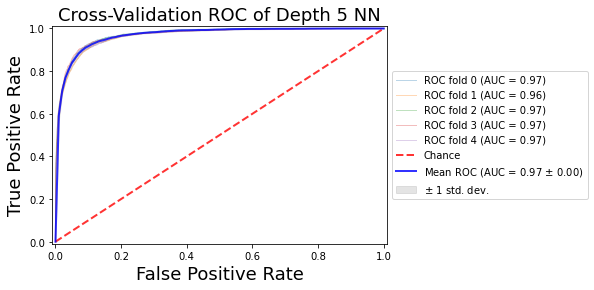

In [17]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
#targets = np.stack(targets)
targets = np.array([np.array(xi) for xi in targets])


n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d5 = translate_to_graph(testData_d5_MWPM, targets[test], mlb)
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800
)
   # Generate generalization metrics
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Train on 254089 samples, validate on 84697 samples
Epoch 1/150
254089/254089 [==============================] - 42s 164us/step - loss: 0.1630 - accuracy: 0.9604 - val_loss: 0.1871 - val_accuracy: 0.9523
Epoch 2/150
254089/254089 [==============================] - 40s 159us/step - loss: 0.1417 - accuracy: 0.9624 - val_loss: 0.1512 - val_accuracy: 0.9529
Epoch 3/150
254089/254089 [==============================] - 48s 189us/step - loss: 0.1117 - accuracy: 0.9643 - val_loss: 0.1195 - val_accuracy: 0.9587
Epoch 4/150
254089/254089 [==============================] - 56s 222us/step - loss: 0.0910 - accuracy: 0.9689 - val_loss: 0.1023 - val_accuracy: 0.9644
Epoch 5/150
254089/254089 [==============================] - 50s 195us/step - loss: 0.0787 - accuracy: 0.9727 - val_loss: 0.0936 - val_accuracy: 0.9677
Epoch 6/150
254089/254089 [==============================] - 46s 180us/step - loss: 0.0717 -

254089/254089 [==============================] - 44s 175us/step - loss: 0.0365 - accuracy: 0.9859 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 54/150
254089/254089 [==============================] - 44s 172us/step - loss: 0.0364 - accuracy: 0.9860 - val_loss: 0.0489 - val_accuracy: 0.9832
Epoch 55/150
254089/254089 [==============================] - 44s 173us/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 56/150
254089/254089 [==============================] - 46s 182us/step - loss: 0.0361 - accuracy: 0.9860 - val_loss: 0.0483 - val_accuracy: 0.9835
Epoch 57/150
254089/254089 [==============================] - 47s 184us/step - loss: 0.0359 - accuracy: 0.9861 - val_loss: 0.0482 - val_accuracy: 0.9835
Epoch 58/150
254089/254089 [==============================] - 49s 192us/step - loss: 0.0358 - accuracy: 0.9861 - val_loss: 0.0480 - val_accuracy: 0.9835
Epoch 59/150
254089/254089 [==============================] - 42s 163us/step - loss: 0.0357 - a

254089/254089 [==============================] - 41s 160us/step - loss: 0.0317 - accuracy: 0.9873 - val_loss: 0.0437 - val_accuracy: 0.9849
Epoch 107/150
254089/254089 [==============================] - 44s 174us/step - loss: 0.0316 - accuracy: 0.9873 - val_loss: 0.0443 - val_accuracy: 0.9848
Epoch 108/150
254089/254089 [==============================] - 46s 183us/step - loss: 0.0316 - accuracy: 0.9874 - val_loss: 0.0440 - val_accuracy: 0.9849
Epoch 109/150
254089/254089 [==============================] - 39s 155us/step - loss: 0.0315 - accuracy: 0.9874 - val_loss: 0.0440 - val_accuracy: 0.9849
Epoch 110/150
254089/254089 [==============================] - 39s 155us/step - loss: 0.0315 - accuracy: 0.9874 - val_loss: 0.0436 - val_accuracy: 0.9850
Epoch 111/150
254089/254089 [==============================] - 39s 155us/step - loss: 0.0314 - accuracy: 0.9874 - val_loss: 0.0434 - val_accuracy: 0.9850
Epoch 112/150
254089/254089 [==============================] - 40s 157us/step - loss: 0.03

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 2 ...
Train on 254090 samples, validate on 84697 samples
Epoch 1/150
254090/254090 [==============================] - 40s 159us/step - loss: 0.1632 - accuracy: 0.9607 - val_loss: 0.1882 - val_accuracy: 0.9523
Epoch 2/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.1426 - accuracy: 0.9624 - val_loss: 0.1496 - val_accuracy: 0.9528
Epoch 3/150
254090/254090 [==============================] - 42s 165us/step - loss: 0.1105 - accuracy: 0.9645 - val_loss: 0.1188 - val_accuracy: 0.9585
Epoch 4/150
254090/254090 [==============================] - 46s 179us/step - loss: 0.0921 - accuracy: 0.9683 - val_loss: 0.1044 - val_accuracy: 0.9634
Epoch 5/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.0805 - accuracy: 0.9718 - val_loss: 0.0942 - val_accuracy: 0.9668
Epoch 6/150
254090/254090 [==============================] - 41s 160us/step - loss: 0.0729 -

254090/254090 [==============================] - 40s 159us/step - loss: 0.0367 - accuracy: 0.9858 - val_loss: 0.0494 - val_accuracy: 0.9829
Epoch 54/150
254090/254090 [==============================] - 41s 161us/step - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.0500 - val_accuracy: 0.9829
Epoch 55/150
254090/254090 [==============================] - 41s 160us/step - loss: 0.0364 - accuracy: 0.9859 - val_loss: 0.0491 - val_accuracy: 0.9830
Epoch 56/150
254090/254090 [==============================] - 43s 168us/step - loss: 0.0363 - accuracy: 0.9860 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 57/150
254090/254090 [==============================] - 42s 165us/step - loss: 0.0362 - accuracy: 0.9860 - val_loss: 0.0486 - val_accuracy: 0.9832
Epoch 58/150
254090/254090 [==============================] - 40s 159us/step - loss: 0.0360 - accuracy: 0.9860 - val_loss: 0.0485 - val_accuracy: 0.9832
Epoch 59/150
254090/254090 [==============================] - 41s 160us/step - loss: 0.0359 - a

254090/254090 [==============================] - 40s 156us/step - loss: 0.0320 - accuracy: 0.9872 - val_loss: 0.0450 - val_accuracy: 0.9846
Epoch 107/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0320 - accuracy: 0.9872 - val_loss: 0.0447 - val_accuracy: 0.9847
Epoch 108/150
254090/254090 [==============================] - 40s 156us/step - loss: 0.0319 - accuracy: 0.9872 - val_loss: 0.0446 - val_accuracy: 0.9847
Epoch 109/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0319 - accuracy: 0.9872 - val_loss: 0.0448 - val_accuracy: 0.9847
Epoch 110/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0318 - accuracy: 0.9873 - val_loss: 0.0448 - val_accuracy: 0.9846
Epoch 111/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0318 - accuracy: 0.9873 - val_loss: 0.0446 - val_accuracy: 0.9846
Epoch 112/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.03

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


------------------------------------------------------------------------
Training for fold 3 ...
Train on 254090 samples, validate on 84697 samples
Epoch 1/150
254090/254090 [==============================] - 39s 152us/step - loss: 0.1634 - accuracy: 0.9600 - val_loss: 0.1869 - val_accuracy: 0.9522
Epoch 2/150
254090/254090 [==============================] - 37s 147us/step - loss: 0.1408 - accuracy: 0.9625 - val_loss: 0.1512 - val_accuracy: 0.9528
Epoch 3/150
254090/254090 [==============================] - 38s 151us/step - loss: 0.1115 - accuracy: 0.9644 - val_loss: 0.1201 - val_accuracy: 0.9585
Epoch 4/150
254090/254090 [==============================] - 40s 156us/step - loss: 0.0908 - accuracy: 0.9688 - val_loss: 0.1040 - val_accuracy: 0.9634
Epoch 5/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.0797 - accuracy: 0.9721 - val_loss: 0.0949 - val_accuracy: 0.9666
Epoch 6/150
254090/254090 [==============================] - 40s 156us/step - loss: 0.0724 -

254090/254090 [==============================] - 40s 159us/step - loss: 0.0365 - accuracy: 0.9859 - val_loss: 0.0492 - val_accuracy: 0.9830
Epoch 54/150
254090/254090 [==============================] - 41s 163us/step - loss: 0.0364 - accuracy: 0.9860 - val_loss: 0.0493 - val_accuracy: 0.9831
Epoch 55/150
254090/254090 [==============================] - 40s 159us/step - loss: 0.0363 - accuracy: 0.9860 - val_loss: 0.0489 - val_accuracy: 0.9831
Epoch 56/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0361 - accuracy: 0.9860 - val_loss: 0.0494 - val_accuracy: 0.9831
Epoch 57/150
254090/254090 [==============================] - 42s 166us/step - loss: 0.0360 - accuracy: 0.9861 - val_loss: 0.0491 - val_accuracy: 0.9832
Epoch 58/150
254090/254090 [==============================] - 40s 159us/step - loss: 0.0359 - accuracy: 0.9861 - val_loss: 0.0481 - val_accuracy: 0.9833
Epoch 59/150
254090/254090 [==============================] - 41s 159us/step - loss: 0.0358 - a

254090/254090 [==============================] - 40s 159us/step - loss: 0.0321 - accuracy: 0.9872 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 107/150
254090/254090 [==============================] - 41s 161us/step - loss: 0.0320 - accuracy: 0.9872 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 108/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.0320 - accuracy: 0.9873 - val_loss: 0.0444 - val_accuracy: 0.9847
Epoch 109/150
254090/254090 [==============================] - 40s 157us/step - loss: 0.0319 - accuracy: 0.9873 - val_loss: 0.0452 - val_accuracy: 0.9846
Epoch 110/150
254090/254090 [==============================] - 40s 158us/step - loss: 0.0319 - accuracy: 0.9873 - val_loss: 0.0442 - val_accuracy: 0.9848
Epoch 111/150
254090/254090 [==============================] - 40s 159us/step - loss: 0.0318 - accuracy: 0.9873 - val_loss: 0.0447 - val_accuracy: 0.9847
Epoch 112/150
254090/254090 [==============================] - 42s 164us/step - loss: 0.03

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


[20000, 0]
[0, 0]
both b and c are zero
[20000, 0]
[0, 0]
both b and c are zero
[18662, 534]
[708, 96]
[18864, 332]
[60, 744]
[19264, 324]
[231, 181]
[19051, 537]
[126, 286]
[19684, 193]
[59, 64]
[19291, 586]
[43, 80]
[19764, 115]
[55, 66]
[19244, 635]
[48, 73]
[19650, 235]
[76, 39]
[19284, 601]
[27, 88]
[19524, 329]
[79, 68]
[19210, 643]
[67, 80]
[18187, 1247]
[287, 279]
[18894, 540]
[181, 385]
[18506, 950]
[328, 216]
[18972, 484]
[100, 444]
[19473, 296]
[121, 110]
[19137, 632]
[64, 167]
[19623, 201]
[91, 85]
[19239, 585]
[72, 104]
[19654, 204]
[64, 78]
[19238, 620]
[71, 71]
[19660, 204]
[59, 77]
[19188, 676]
[67, 69]
[19363, 461]
[79, 97]
[19172, 652]
[56, 120]
[18891, 487]
[247, 375]
[18850, 528]
[203, 419]
[18988, 428]
[250, 334]
[18941, 475]
[198, 386]
[19343, 496]
[95, 66]
[19225, 614]
[58, 103]
[19664, 197]
[67, 72]
[19296, 565]
[56, 83]
[19618, 237]
[79, 66]
[19236, 619]
[46, 99]
[19484, 369]
[72, 75]
[19239, 614]
[73, 74]
[19478, 331]
[109, 82]
[19183, 626]
[88, 103]
[18531, 8

<Figure size 720x720 with 0 Axes>

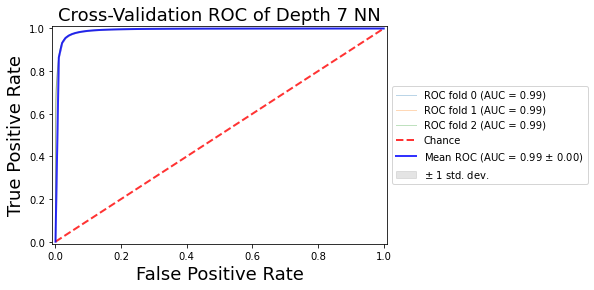

In [11]:
kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
   # x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro')
    else:
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro')
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [329]:
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('-----------------------------------------------')

TOTAL F1 NN: [0.7466026170895966, 0.7447298695420905, 0.7449999416902822]
TOTAL F1 PLUT: [0.07436437291975014, 0.07319961646740877, 0.07392483964771193]
TOTAL F1 MWPM: [0.5570304203885315, 0.5576631378129446, 0.5564358397963814]
TOTAL ACC NN: [0.9817760586738586, 0.9817712903022766, 0.9817626262626084]
TOTAL ACC PLUT: [0.960282959944449, 0.960287018882497, 0.9603099766722879]
TOTAL ACC MWPM: [0.9570212121211669, 0.9571409090908701, 0.9570479797979491]
TOTAL TIME NN: [13.6240815, 12.273374, 11.9565955]
TOTAL TIME PLUT: [27.279464, 16.1340635, 5.2510398]
TOTAL TIME MWPM: [4881.778657700013, 9217.311648799974, 3500.318302099989]
-----------------------------------------------


In [ ]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
#f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\ipykernel_launcher.py:74: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\clair\Anaconda3\envs\CNNs\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


[20000, 0]
[0, 0]
both b and c are zero
[20000, 0]
[0, 0]
both b and c are zero
[18054, 1145]
[621, 180]
[19047, 152]
[21, 780]
[18626, 796]
[335, 243]
[19002, 420]
[148, 430]
[19287, 478]
[115, 120]
[19151, 614]
[90, 145]
[19477, 295]
[89, 139]
[19136, 636]
[59, 169]
[19293, 487]
[99, 121]
[19111, 669]
[85, 135]
[19112, 663]
[87, 138]
[19133, 642]
[99, 126]
[17479, 1895]
[365, 261]
[19026, 348]
[115, 511]
[17995, 1396]
[309, 300]
[19020, 371]
[105, 504]
[19027, 641]
[145, 187]
[19091, 577]
[106, 226]
[19194, 507]
[138, 161]
[19105, 596]
[119, 180]
[19288, 449]
[97, 166]
[19101, 636]
[140, 123]
[19404, 347]
[94, 155]
[19098, 653]
[123, 126]
[18949, 761]
[133, 157]
[19085, 625]
[136, 154]
[19090, 284]
[76, 550]
[19053, 321]
[82, 544]
[19066, 339]
[87, 508]
[19007, 398]
[91, 504]
[18783, 938]
[119, 160]
[19113, 608]
[95, 184]
[19198, 514]
[116, 172]
[19068, 644]
[150, 138]
[19176, 549]
[109, 166]
[19082, 643]
[87, 188]
[19093, 654]
[130, 123]
[19165, 582]
[80, 173]
[19201, 515]
[115, 169

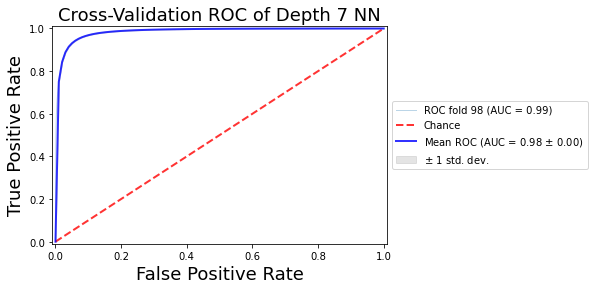

In [331]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

if fold_no < 3:
    acc = partial_accuracy(targets[test], pred_plut_d7)
    f1 = f1_score(targets[test], pred_plut_d7, average='micro')
else:
    pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
    #f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
    acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

pred = model_d7.predict(inputs_test_2)
pred[pred>=.5]=1 
pred[pred<.5]=0
acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
f1 = f1_score(targets_test_2, pred, average='micro')

#acc_per_fold.append(acc)
f1_per_fold.append(f1)

# Increase fold number
fold_no = fold_no + 1

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
"""
model_d5 = compile_FFNN_model_DepthFive(5)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5.values,
    y=Y_train_d5,
    validation_split=.25,
    epochs = 500
)"""

In [ ]:
"""
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')"""

In [ ]:
"""
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')"""

In [ ]:
"""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d5 = model_d5.predict(x_test_d5.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d5.copy()

thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d5.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d5, pred, average='micro')
    recall = recall_score(Y_test_d5, pred, average='micro')
    f1 = f1_score(Y_test_d5, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d5, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d5, pred))
    print("\n")"""

In [ ]:
"""
pred=predictions_d5.copy()
from sklearn.metrics import multilabel_confusion_matrix, classification_report
#look at confusion matrix to see what got misclassified    
pred[pred>=.5]=1
pred[pred<.5]=0
multilabel_confusion_matrix(Y_test_d5, pred)
"""

In [ ]:
"""
#look at classifcation report to see what got mislabeled
print(classification_report(Y_test_d5, pred))
"""

In [131]:
model_d7 = compile_FFNN_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_train_d7.values,
    y=Y_train_d7,
    validation_split=.25,
    epochs= 150
)

Fit model on training data
Train on 304908 samples, validate on 101636 samples
Epoch 1/150
304908/304908 [==============================] - 61s 200us/step - loss: 0.1685 - accuracy: 0.9585 - val_loss: 0.1573 - val_accuracy: 0.9599
Epoch 2/150
304908/304908 [==============================] - 62s 202us/step - loss: 0.1335 - accuracy: 0.9607 - val_loss: 0.1117 - val_accuracy: 0.9631
Epoch 3/150
304908/304908 [==============================] - 64s 210us/step - loss: 0.0985 - accuracy: 0.9665 - val_loss: 0.0879 - val_accuracy: 0.9699
Epoch 4/150
304908/304908 [==============================] - 68s 224us/step - loss: 0.0809 - accuracy: 0.9721 - val_loss: 0.0749 - val_accuracy: 0.9742
Epoch 5/150
304908/304908 [==============================] - 73s 238us/step - loss: 0.0704 - accuracy: 0.9757 - val_loss: 0.0666 - val_accuracy: 0.9771
Epoch 6/150
304908/304908 [==============================] - 58s 190us/step - loss: 0.0630 - accuracy: 0.9783 - val_loss: 0.0602 - val_accuracy: 0.9793
Epoch 7/1

304908/304908 [==============================] - 59s 194us/step - loss: 0.0185 - accuracy: 0.9915 - val_loss: 0.0202 - val_accuracy: 0.9908
Epoch 108/150
304908/304908 [==============================] - 58s 189us/step - loss: 0.0184 - accuracy: 0.9915 - val_loss: 0.0204 - val_accuracy: 0.9908
Epoch 109/150
304908/304908 [==============================] - 58s 189us/step - loss: 0.0184 - accuracy: 0.9915 - val_loss: 0.0197 - val_accuracy: 0.9909
Epoch 110/150
304908/304908 [==============================] - 60s 198us/step - loss: 0.0183 - accuracy: 0.9916 - val_loss: 0.0196 - val_accuracy: 0.9909
Epoch 111/150
304908/304908 [==============================] - 58s 190us/step - loss: 0.0183 - accuracy: 0.9915 - val_loss: 0.0197 - val_accuracy: 0.9909
Epoch 112/150
304908/304908 [==============================] - 58s 189us/step - loss: 0.0182 - accuracy: 0.9916 - val_loss: 0.0197 - val_accuracy: 0.9909
Epoch 113/150
304908/304908 [==============================] - 57s 188us/step - loss: 0.01

Text(0, 0.5, 'Loss (MSE)')

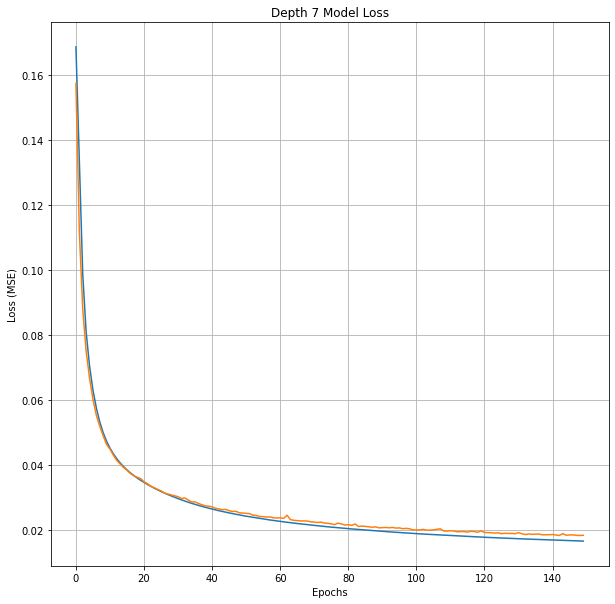

In [133]:
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

Text(0, 0.5, 'Accuracy')

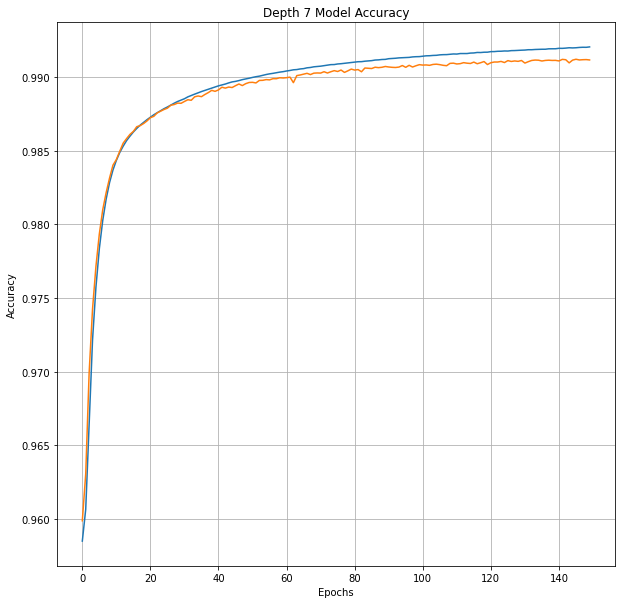

In [134]:
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [136]:
""""""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d7 = model_d7.predict(x_test_d7.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d7.copy()


thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d7.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d7, pred, average='micro')
    recall = recall_score(Y_test_d7, pred, average='micro')
    f1 = f1_score(Y_test_d7, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d7, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d7, pred))
    print("\n")

Time: 4.547666311264038
Micro-average quality numbers
Precision: 0.7567, Recall: 0.9810, F1-measure: 0.8544
Accuracy =  0.36361131882403874
Accuracy =  0.9866029137051278


Micro-average quality numbers
Precision: 0.8088, Recall: 0.9604, F1-measure: 0.8781
Accuracy =  0.43610531701365657
Accuracy =  0.9893198783056936


Micro-average quality numbers
Precision: 0.8427, Recall: 0.9340, F1-measure: 0.8860
Accuracy =  0.4861171238537526
Accuracy =  0.9903745431803124


Micro-average quality numbers
Precision: 0.8738, Recall: 0.9030, F1-measure: 0.8882
Accuracy =  0.5202782478649297
Accuracy =  0.9908926328892962


Micro-average quality numbers
Precision: 0.9049, Recall: 0.8706, F1-measure: 0.8874
Accuracy =  0.527687040025188
Accuracy =  0.9911501372890424


Micro-average quality numbers
Precision: 0.9356, Recall: 0.8387, F1-measure: 0.8845
Accuracy =  0.5064839230194026
Accuracy =  0.9912244766525676


Micro-average quality numbers
Precision: 0.9620, Recall: 0.8108, F1-measure: 0.8799
Acc

In [ ]:
"""
predictions_d7 = model_d7.predict(x_test_d7.values)
pred=predictions_d7.copy()

n_classes = 99

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_d7[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_d7.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()"""

In [ ]:
"""
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()"""

In [ ]:
"""
x_train_d3.to_csv("x_train_d3_01.csv")
x_test_d3.to_csv("x_test_d3_01.csv")
pd.DataFrame(Y_train_d3).to_csv("Y_train_d3_01.csv")
pd.DataFrame(Y_test_d3).to_csv("Y_test_d3_01.csv")

x_train_d5.to_csv("x_train_d5_01.csv")
x_test_d5.to_csv("x_test_d5_01.csv")
pd.DataFrame(Y_train_d5).to_csv("Y_train_d5_01.csv")
pd.DataFrame(Y_test_d5).to_csv("Y_test_d5_01.csv")

x_train_d7.to_csv("x_train_d7_01.csv")
x_test_d7.to_csv("x_test_d7_01.csv")
pd.DataFrame(Y_train_d7).to_csv("Y_train_d7_01.csv")
pd.DataFrame(Y_test_d7).to_csv("Y_test_d7_01.csv")"""

In [ ]:
"""
model_d7.save("model_d7_01.h5")
model_d5.save("model_d5_01.h5")
model.save("model_d3_01.h5")"""